In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import joblib
from xgboost import XGBRegressor

In [2]:
selected_columns = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
                    'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
                    'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                    'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
                    'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                    'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
                    'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
                    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
                    'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
                    'SalePrice']

# Load the dataset with selected columns
house = pd.read_csv('/kaggle/input/house-pred/train.csv', usecols=selected_columns)
house_test=pd.read_csv('/kaggle/input/house-pred/test.csv', usecols=selected_columns)

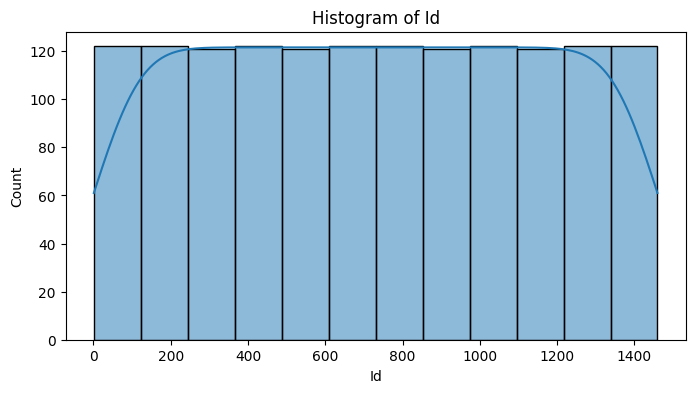

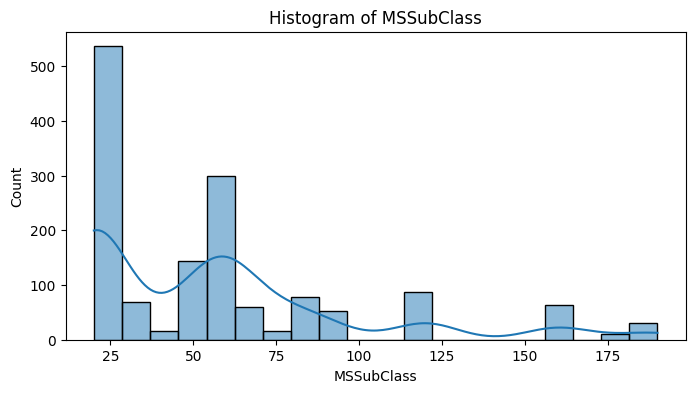

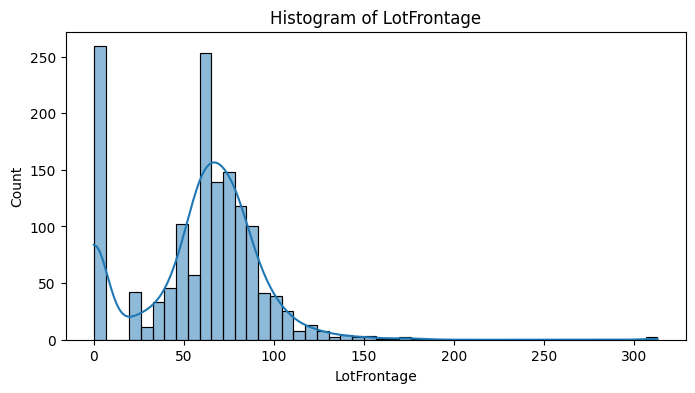

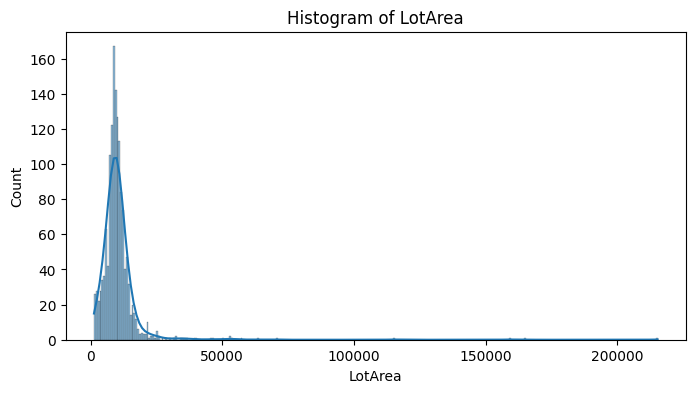

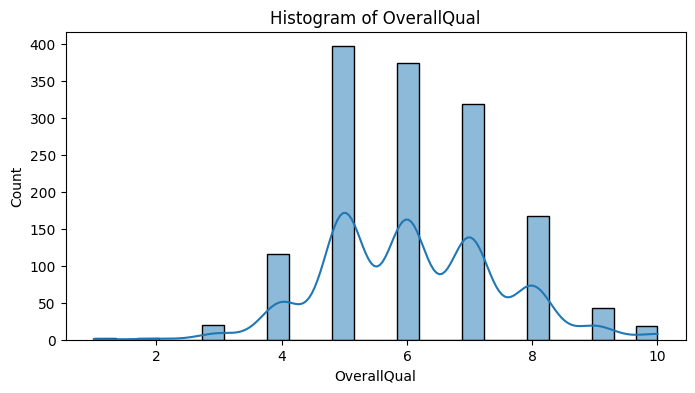

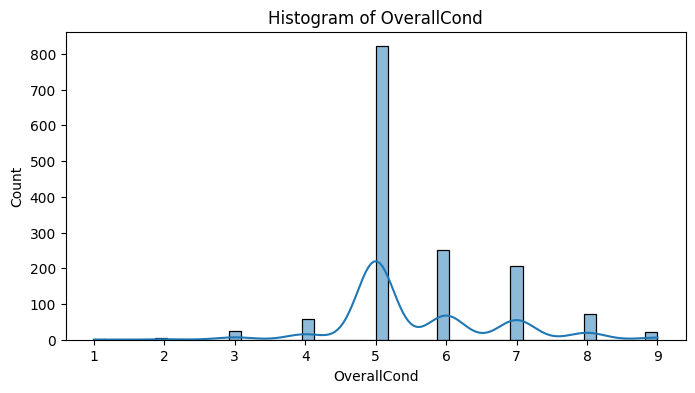

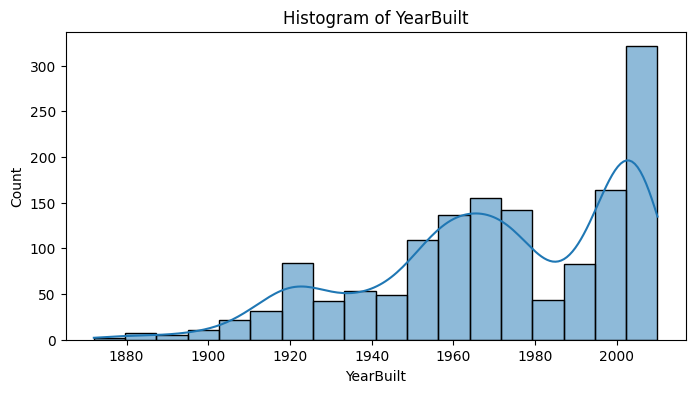

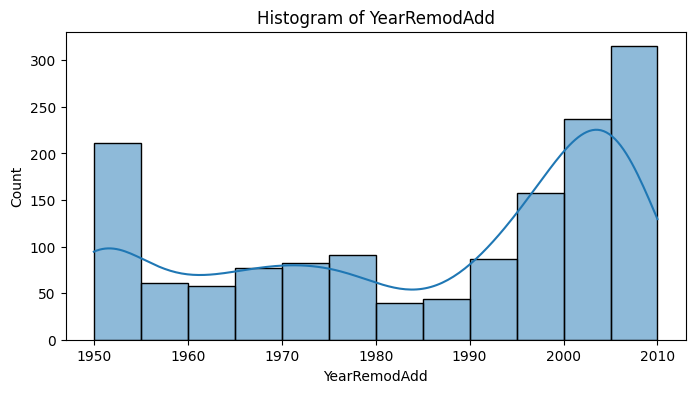

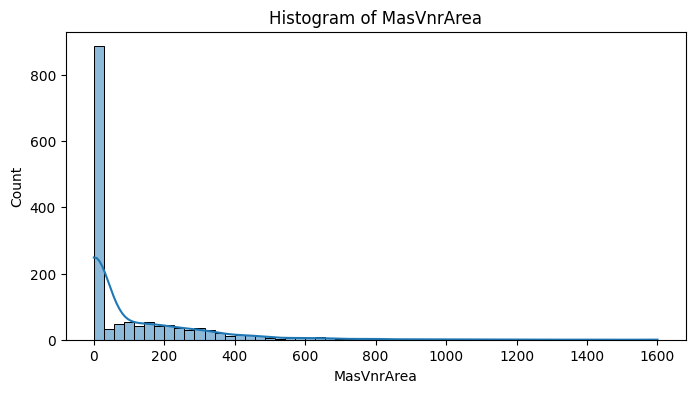

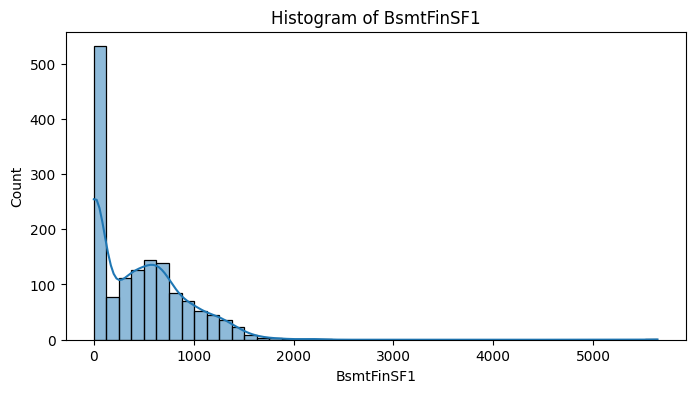

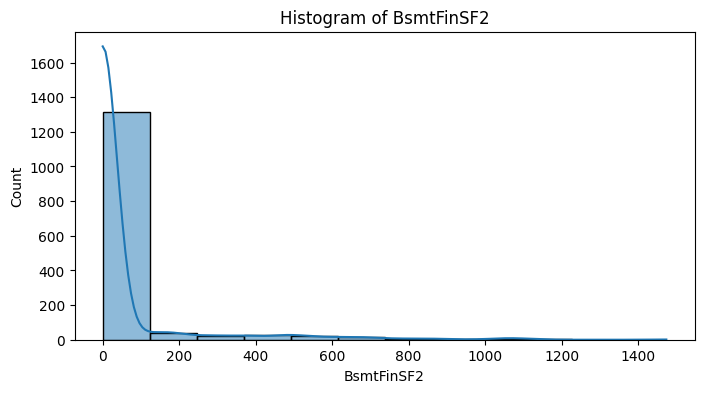

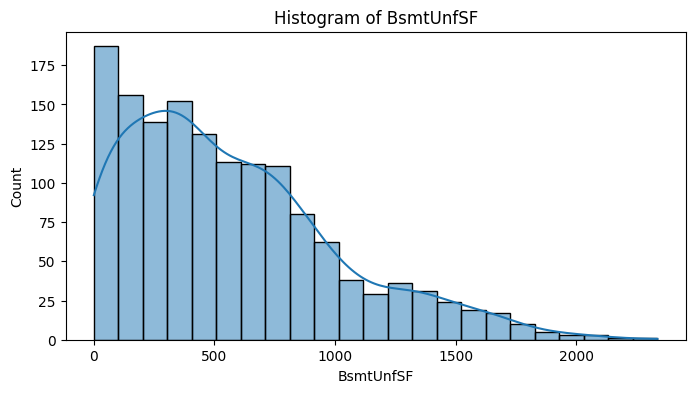

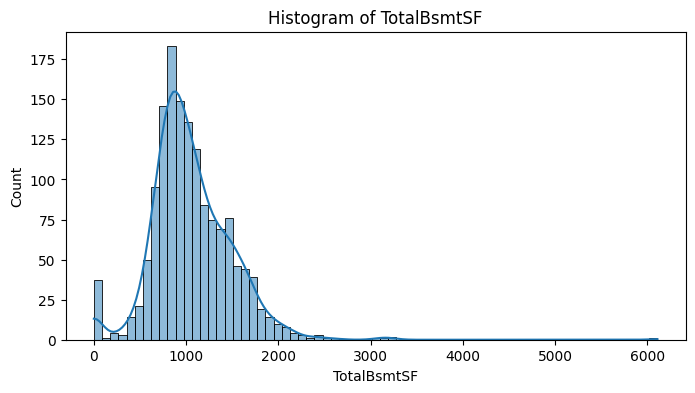

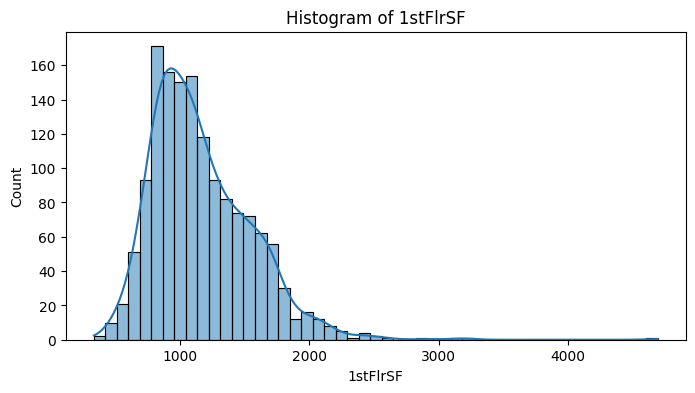

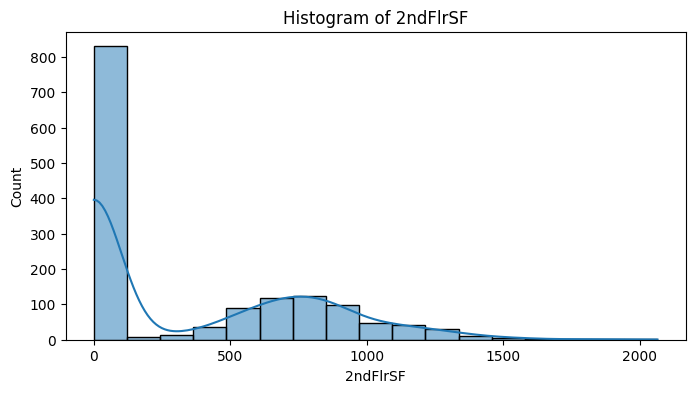

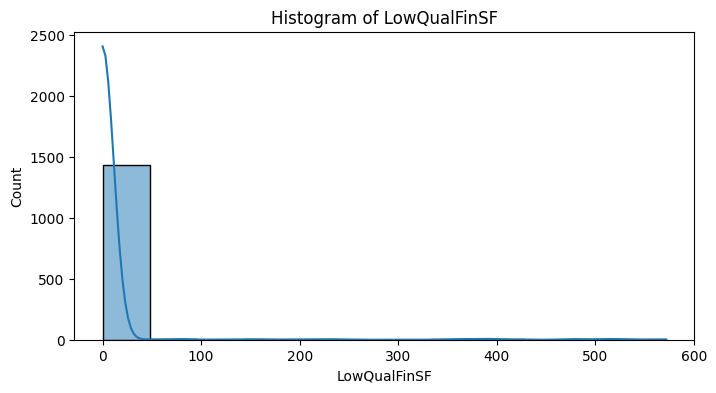

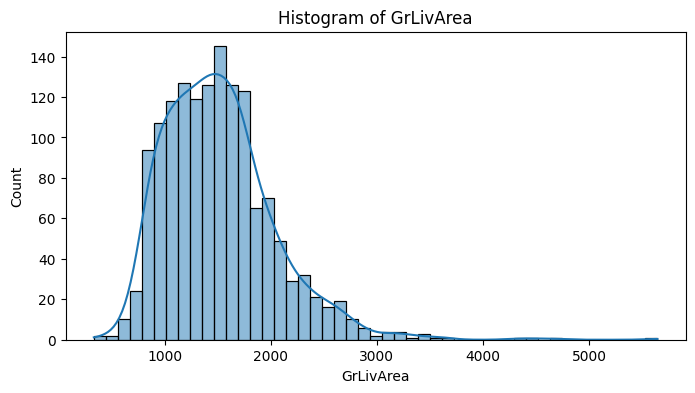

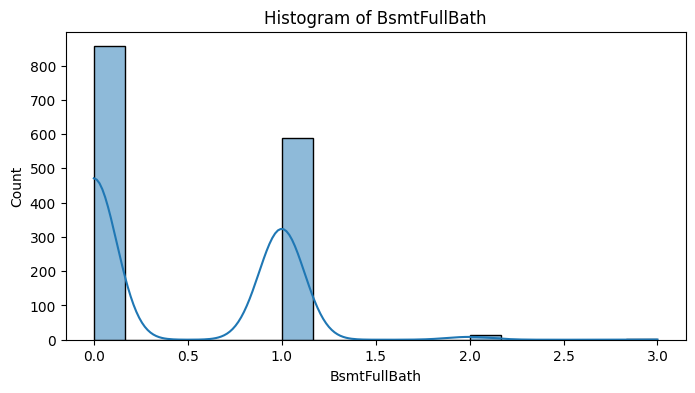

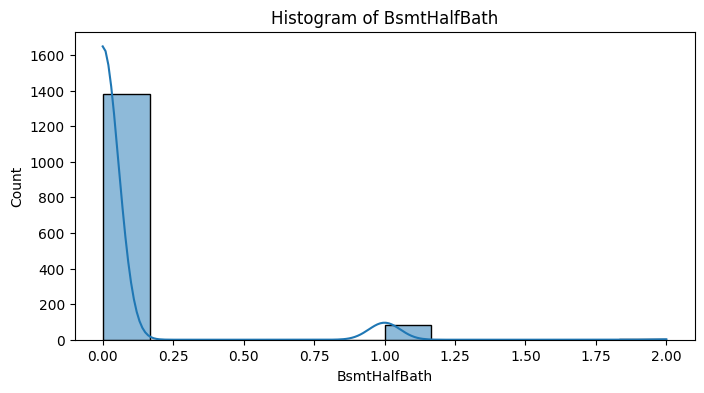

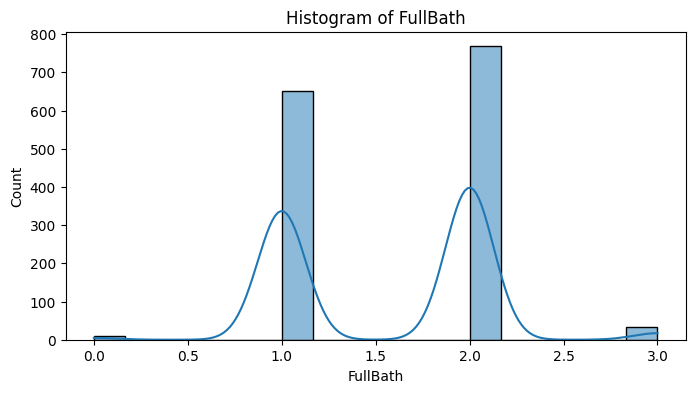

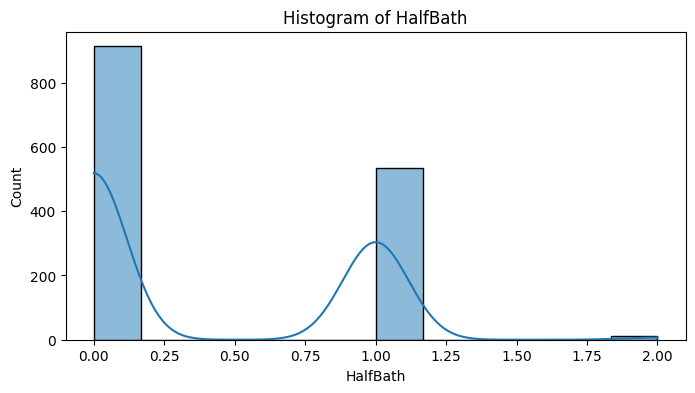

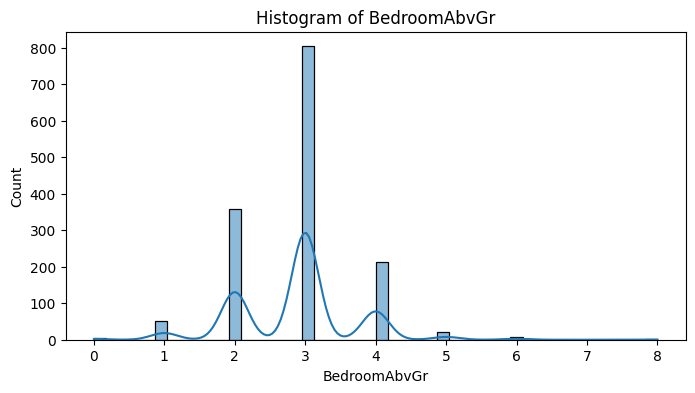

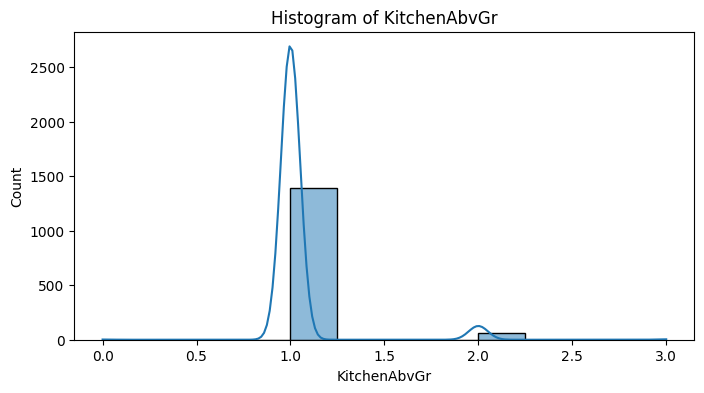

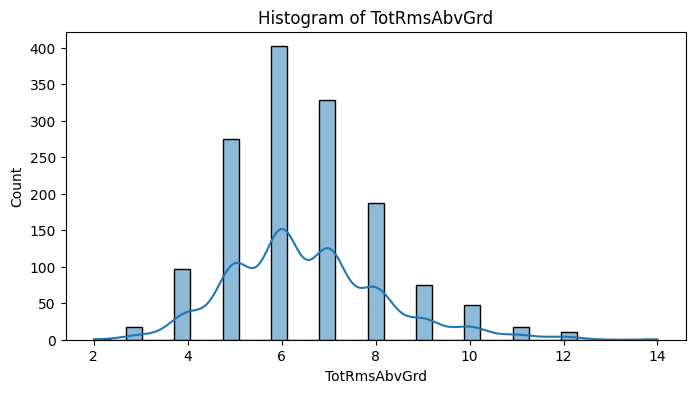

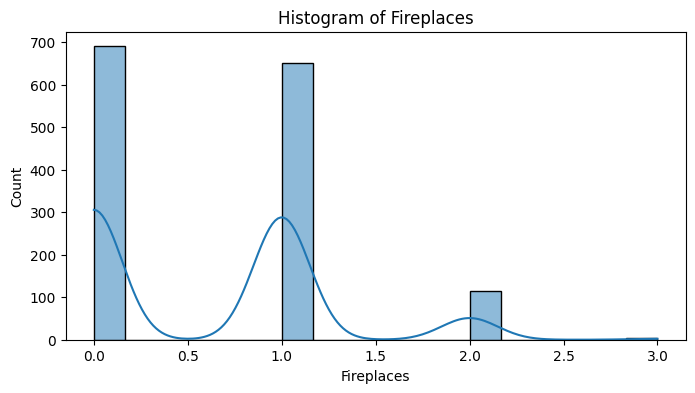

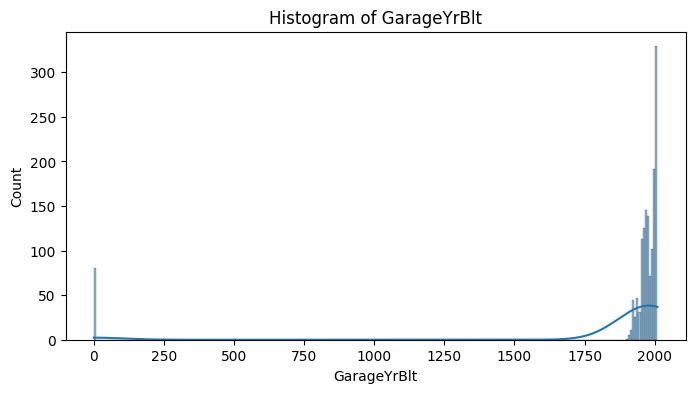

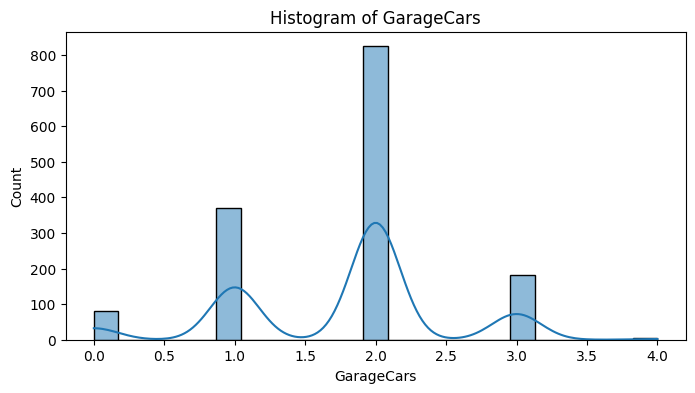

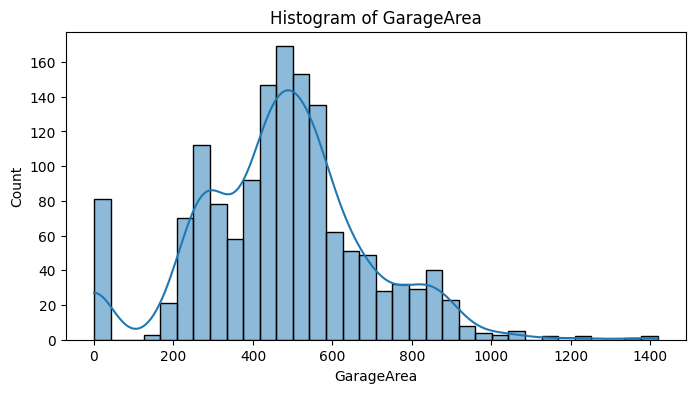

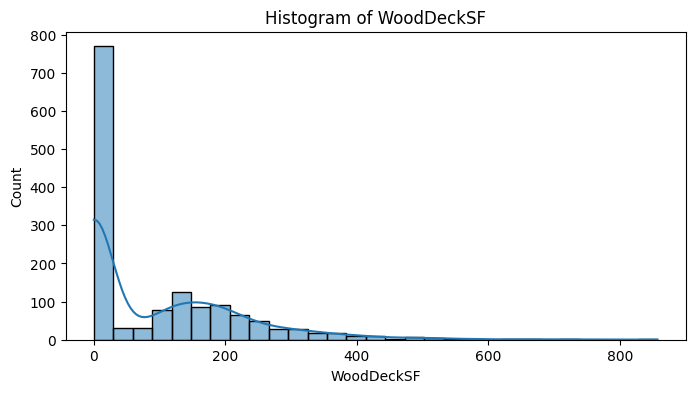

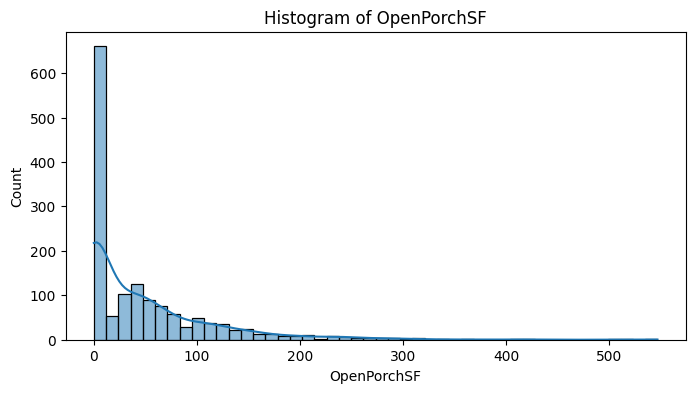

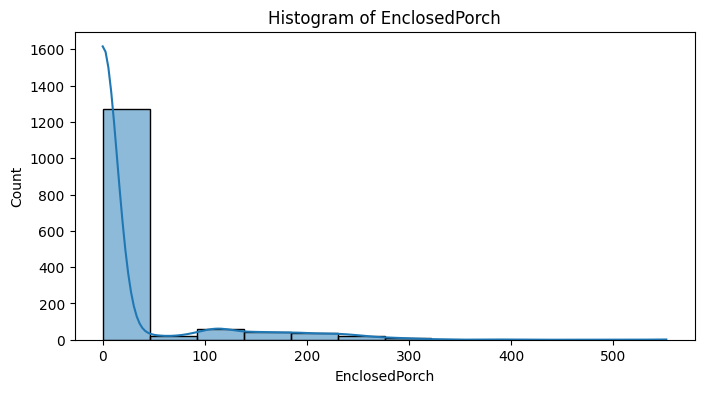

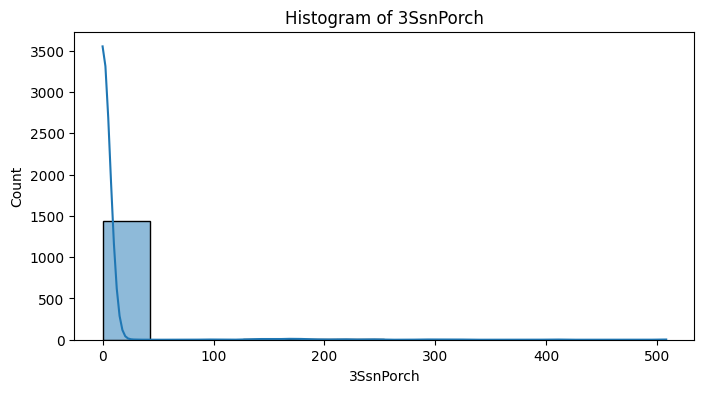

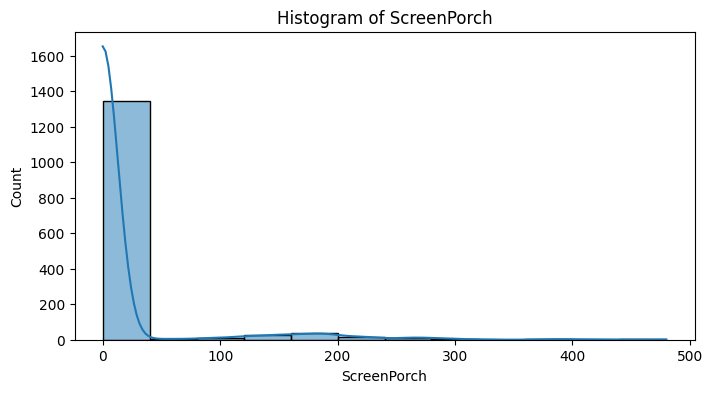

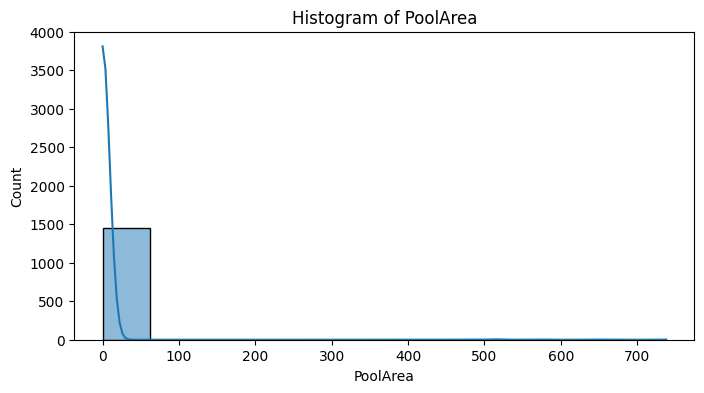

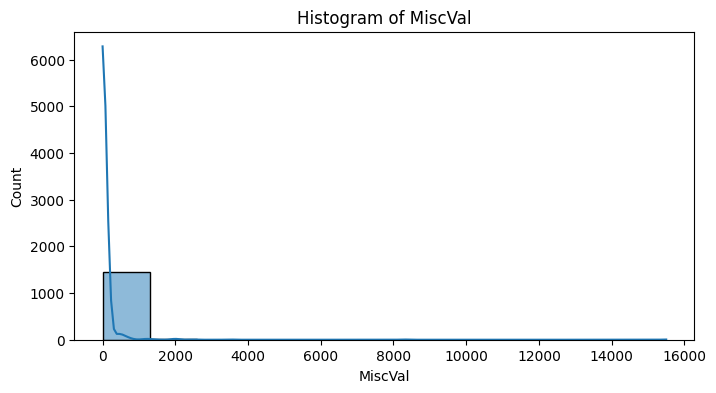

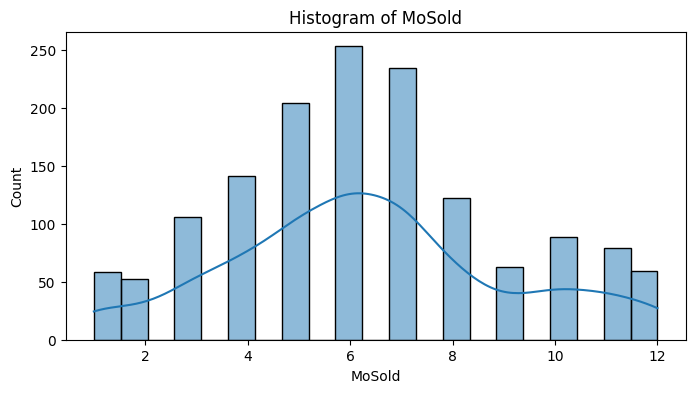

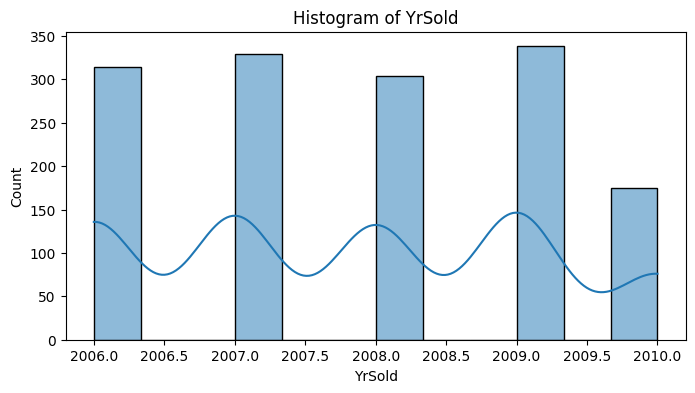

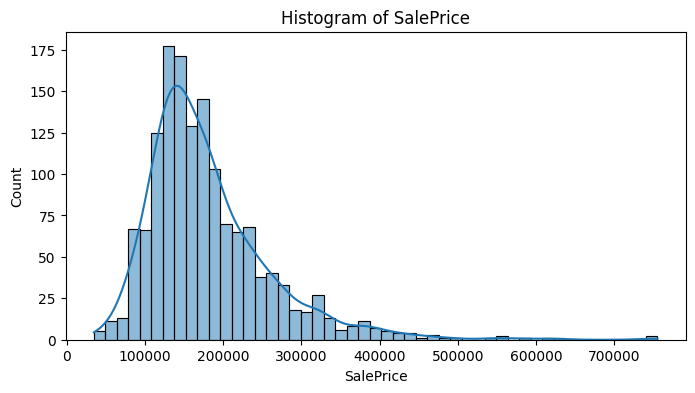

In [3]:
# Histograms for numeric columns
numeric_cols = house.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=house, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()



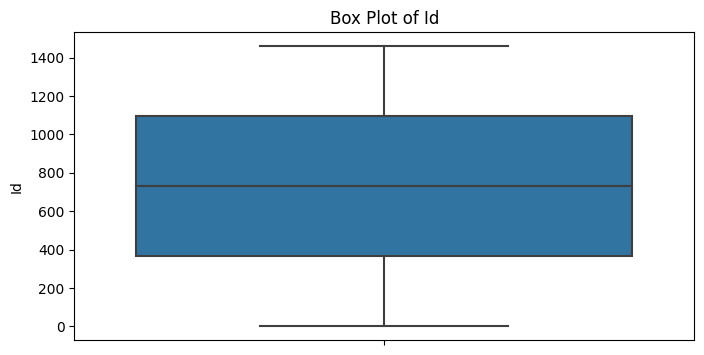

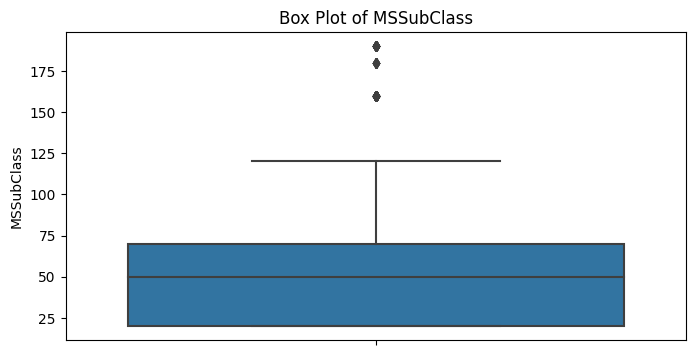

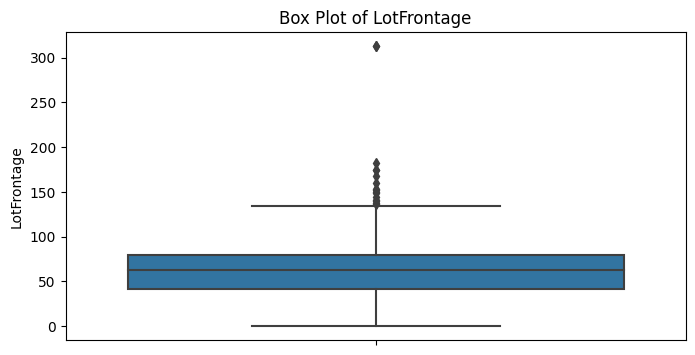

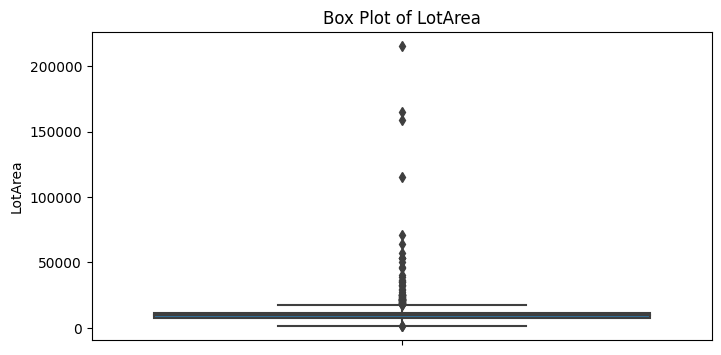

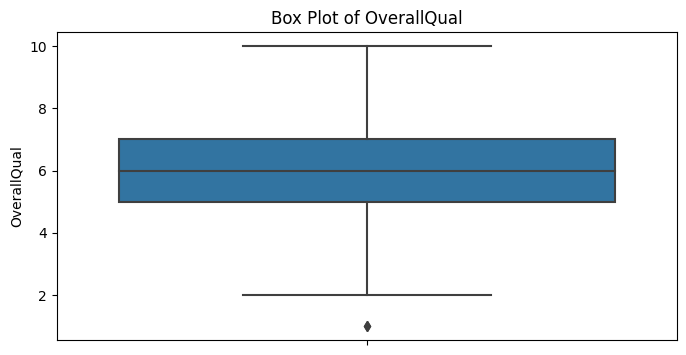

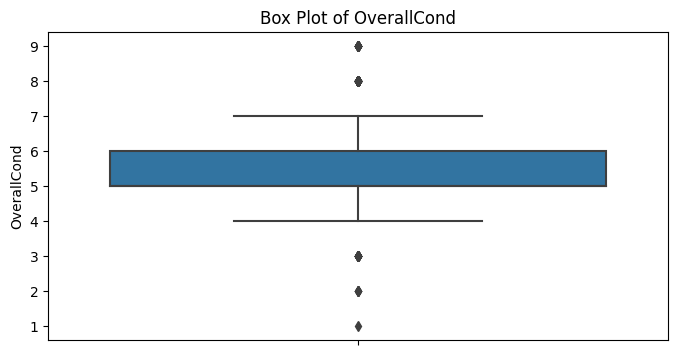

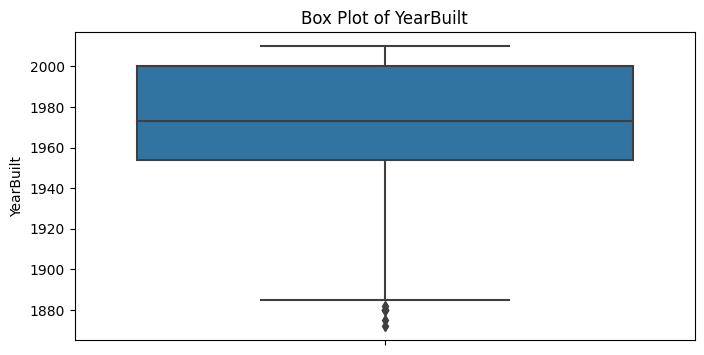

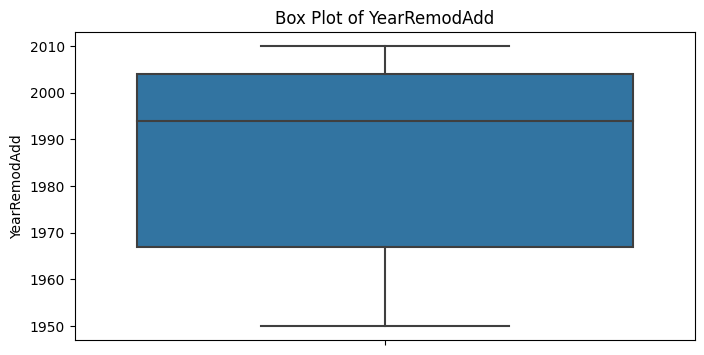

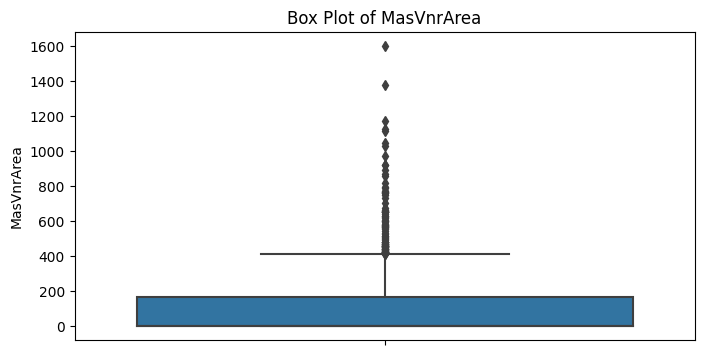

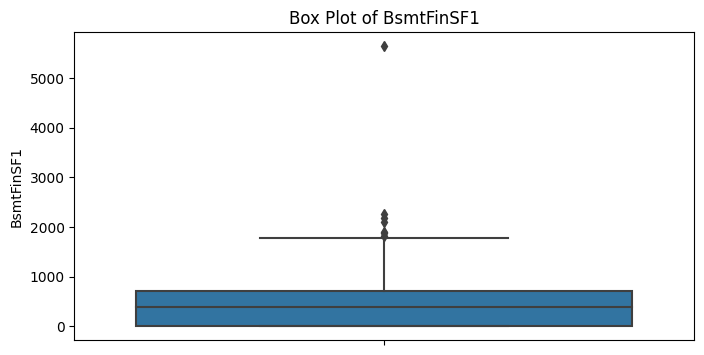

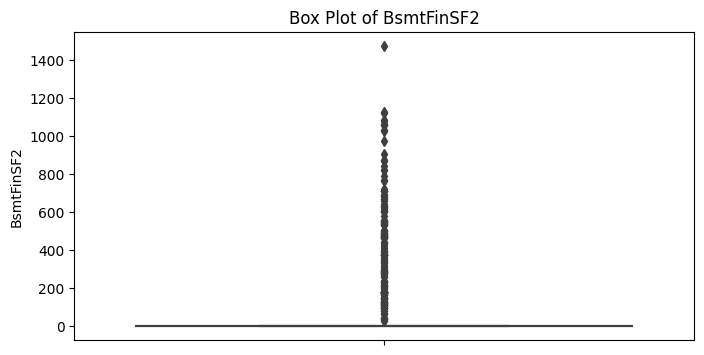

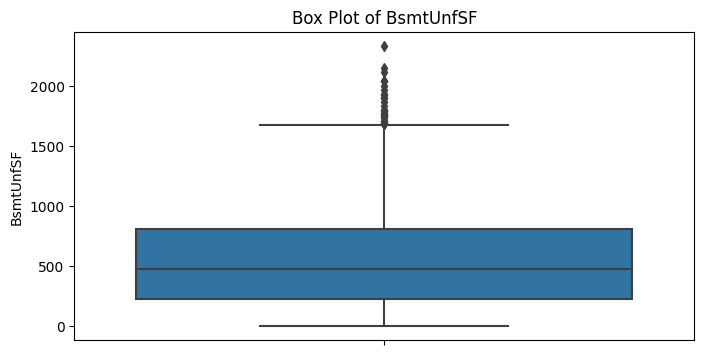

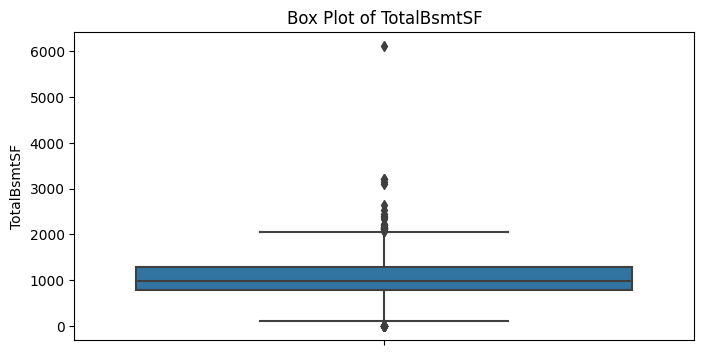

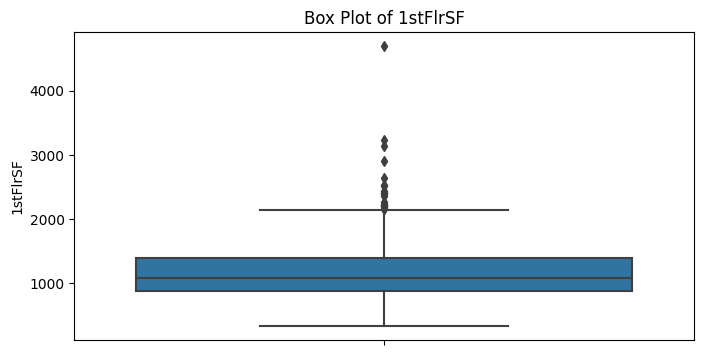

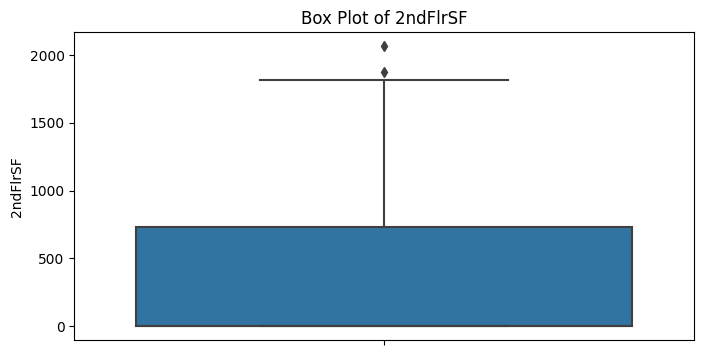

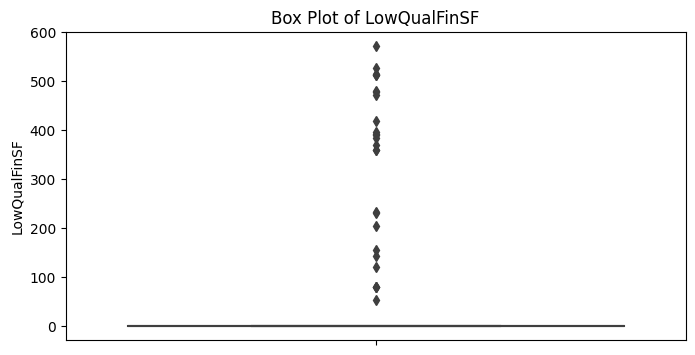

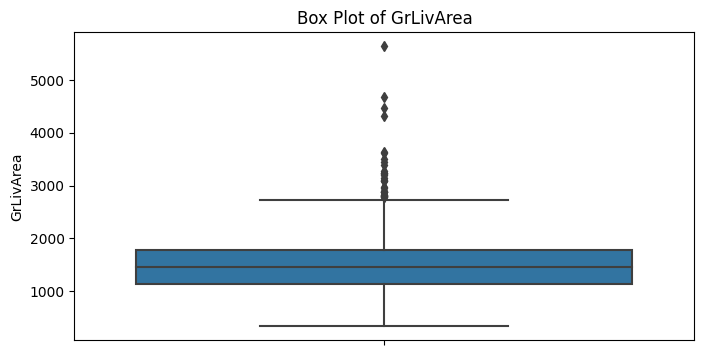

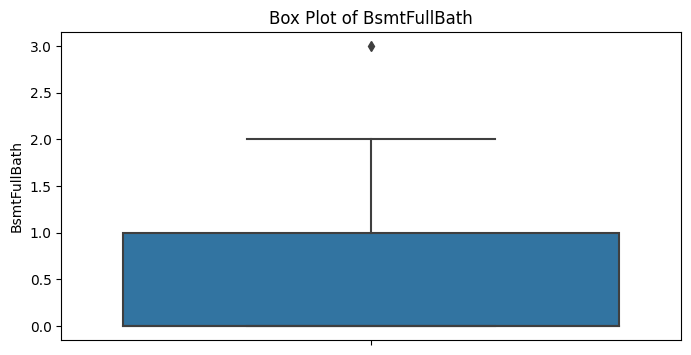

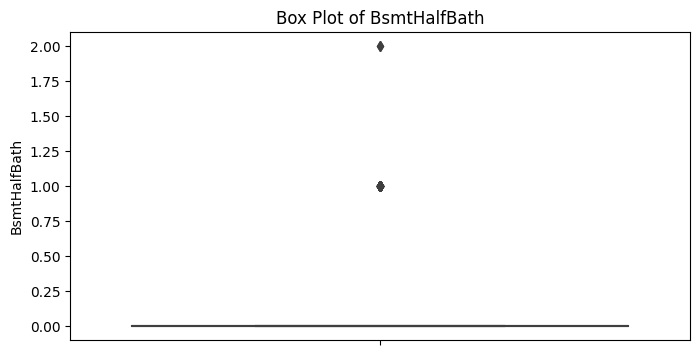

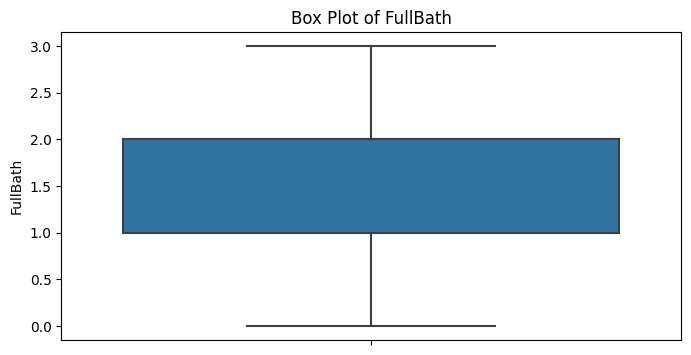

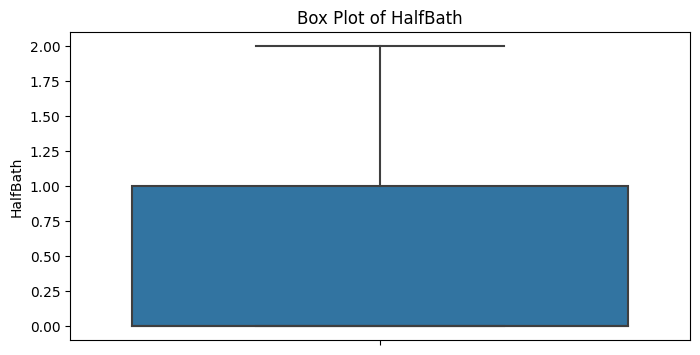

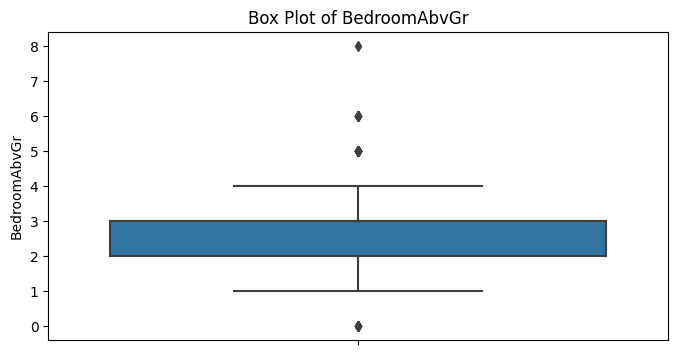

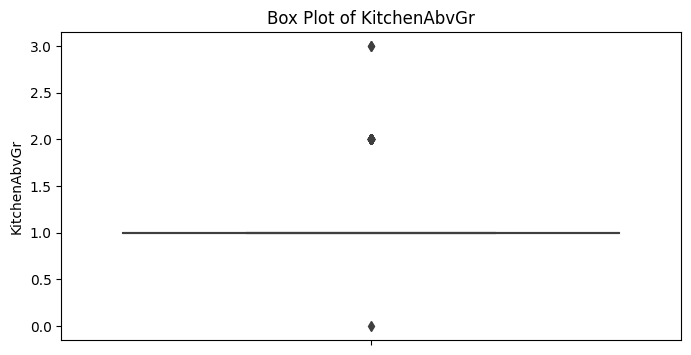

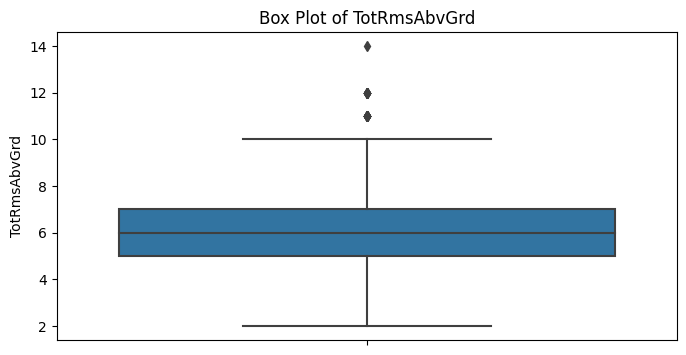

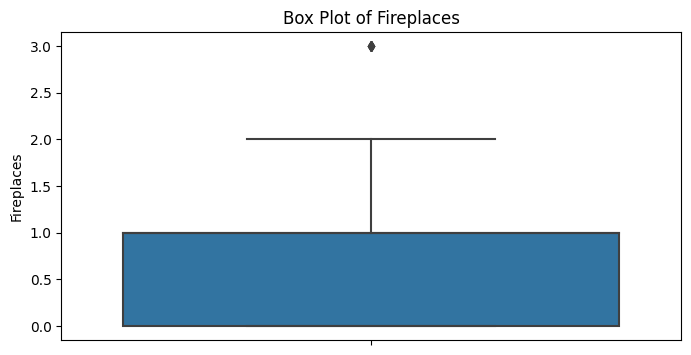

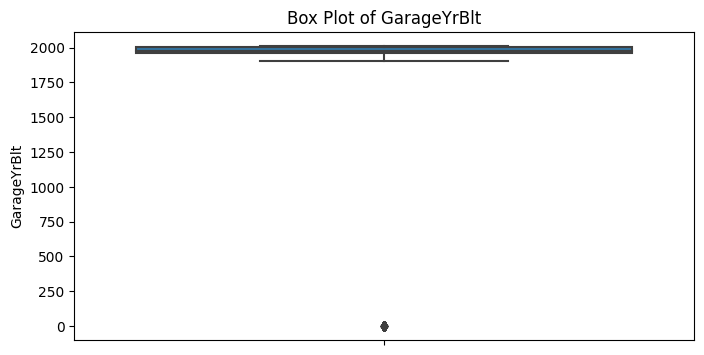

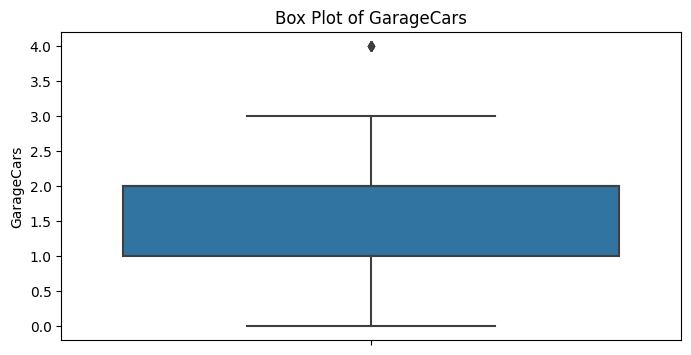

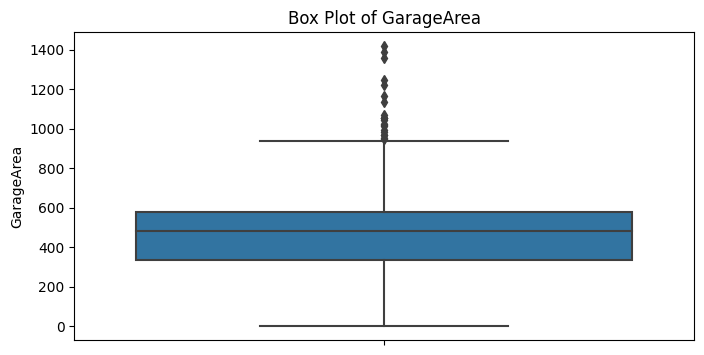

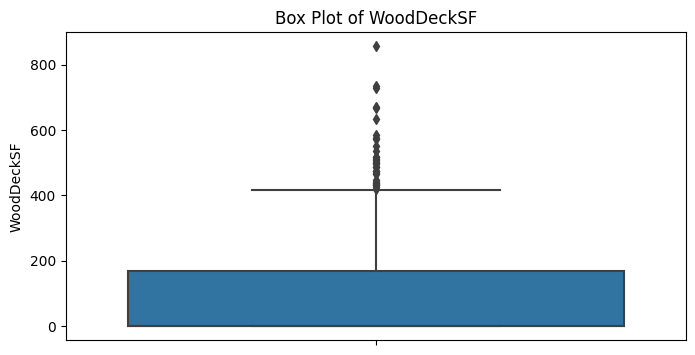

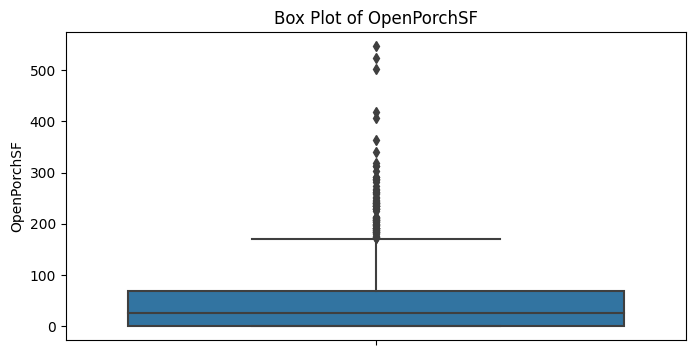

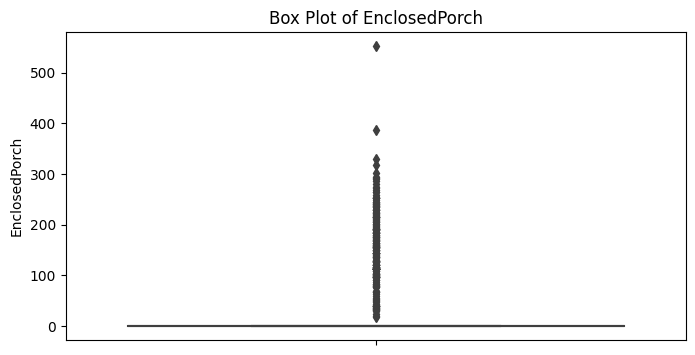

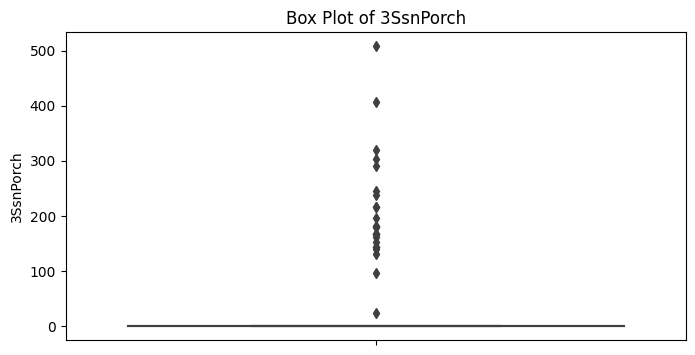

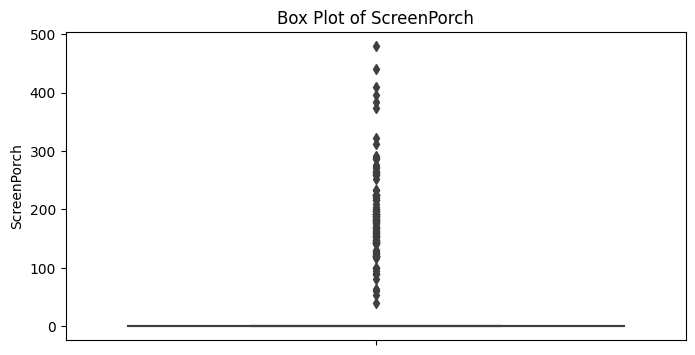

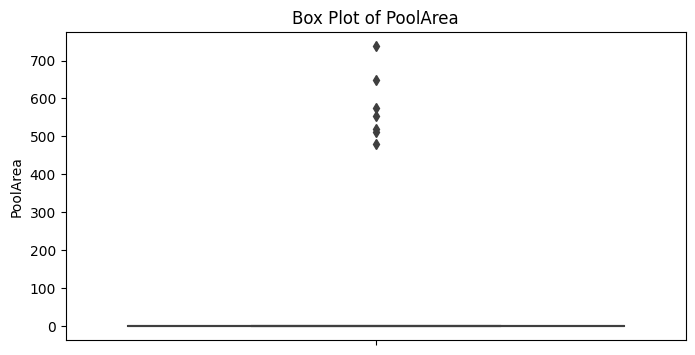

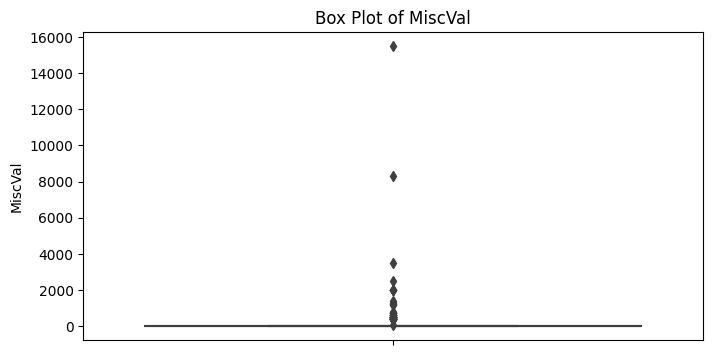

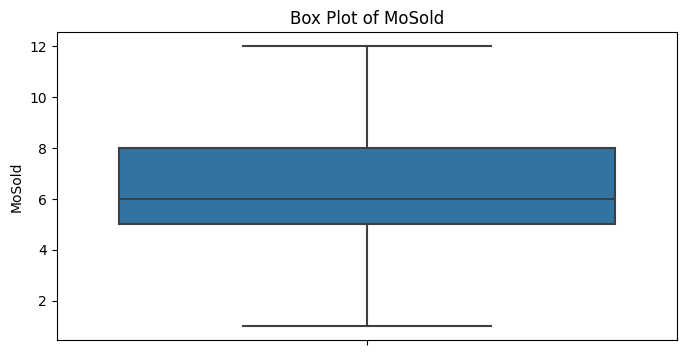

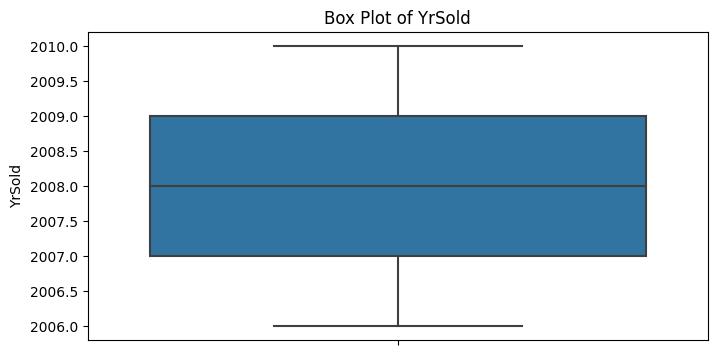

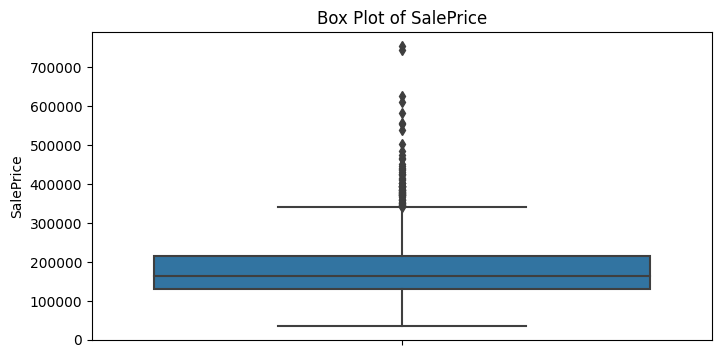

In [4]:
# Box plots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=house, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()



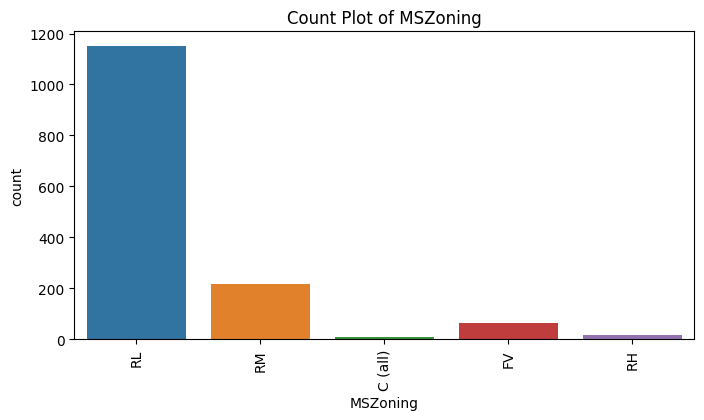

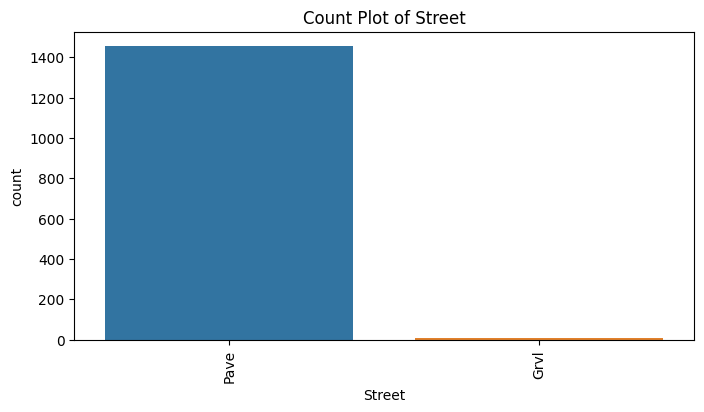

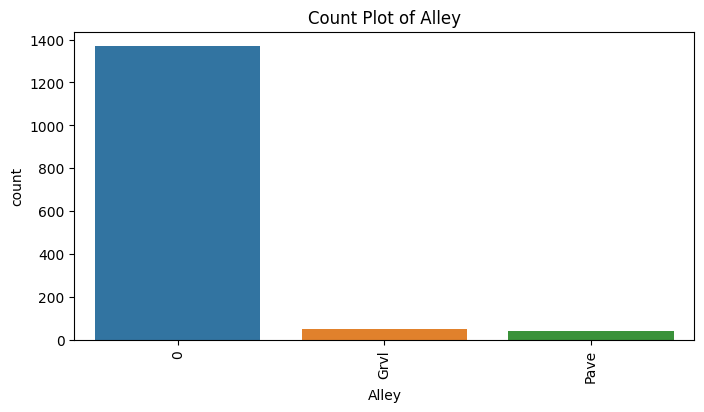

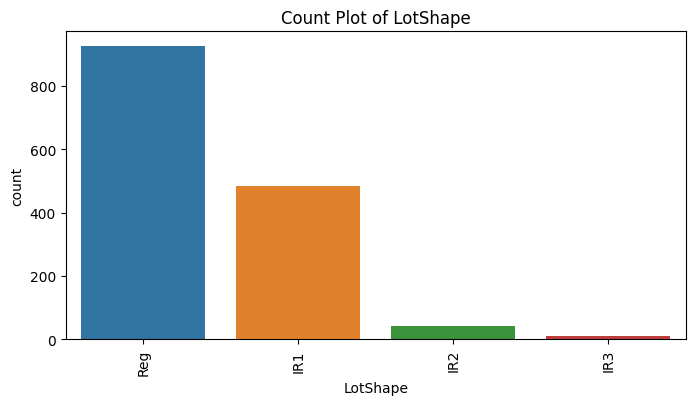

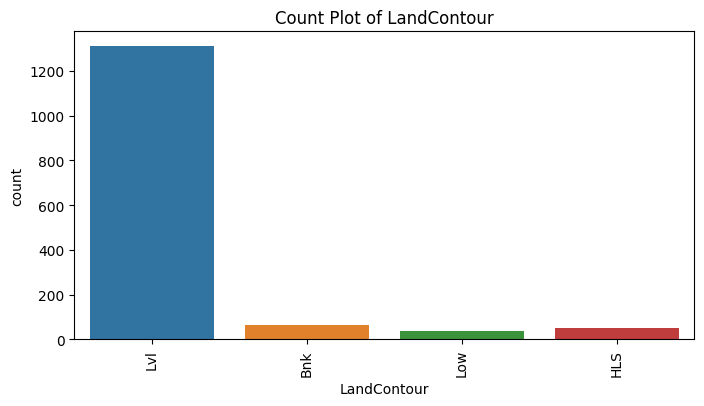

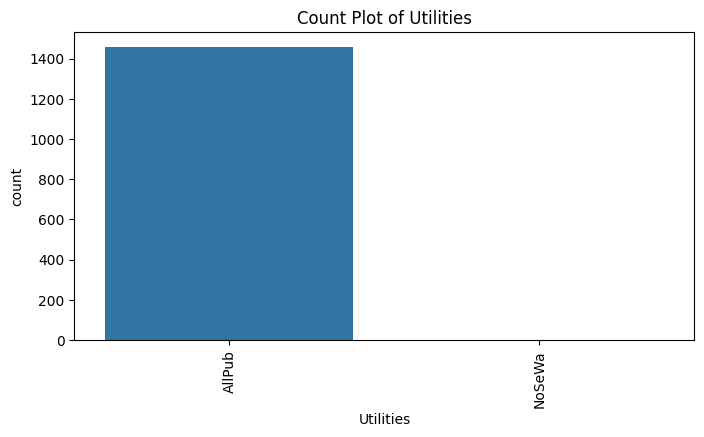

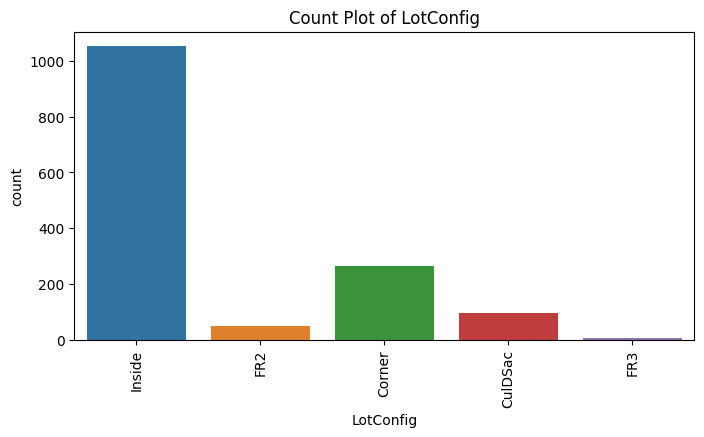

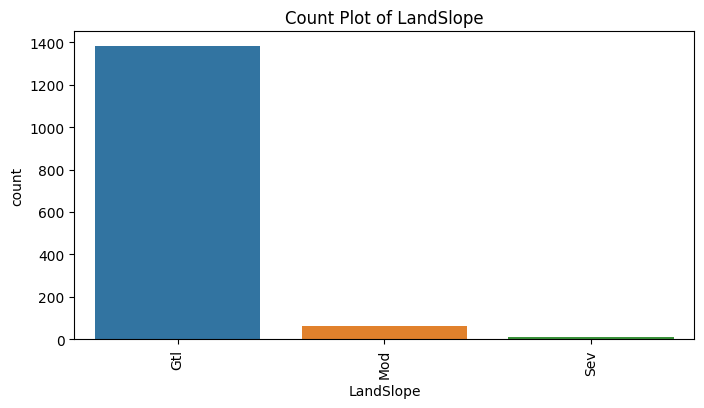

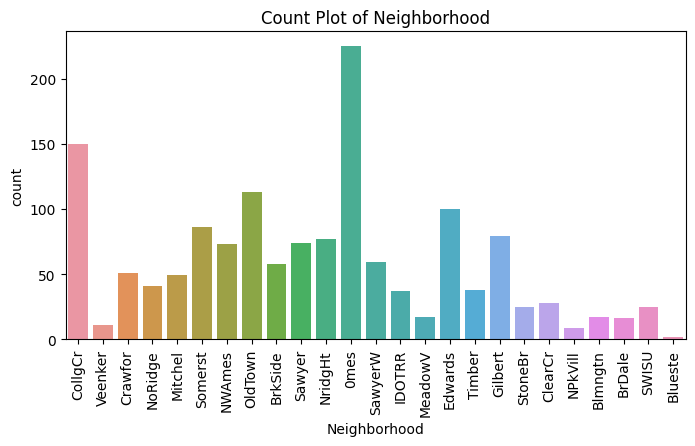

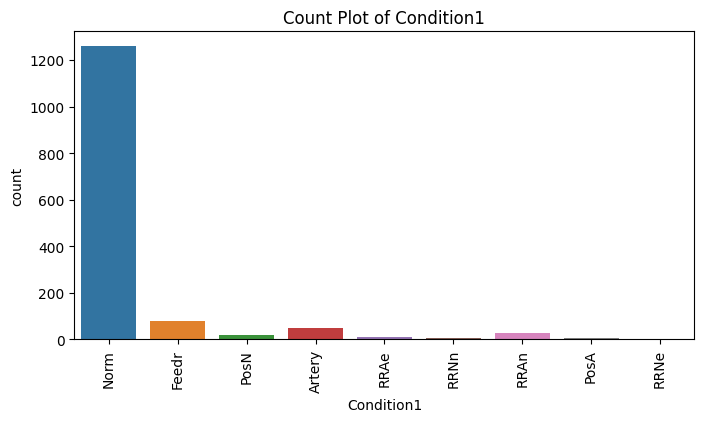

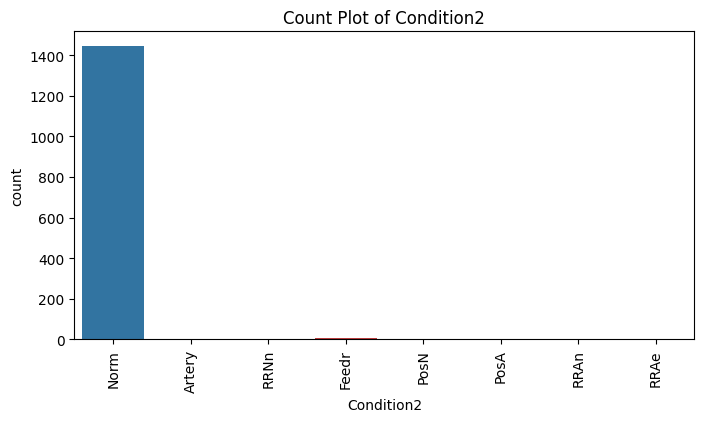

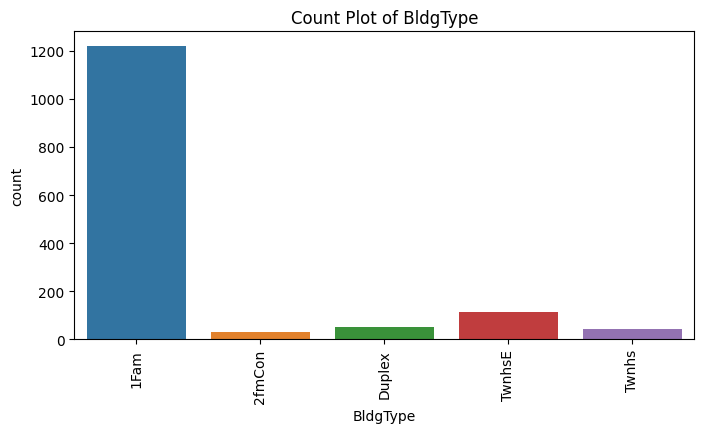

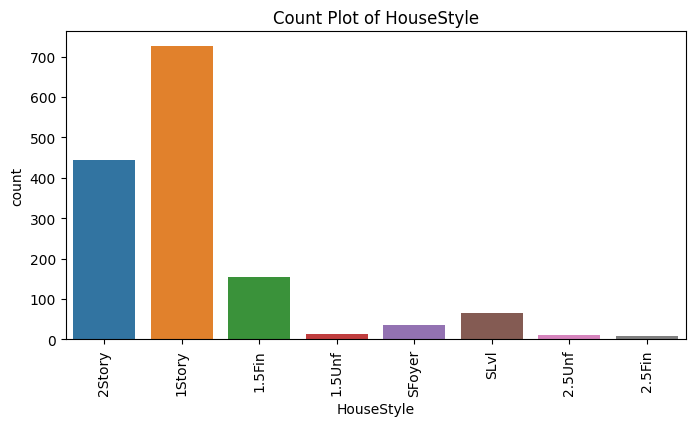

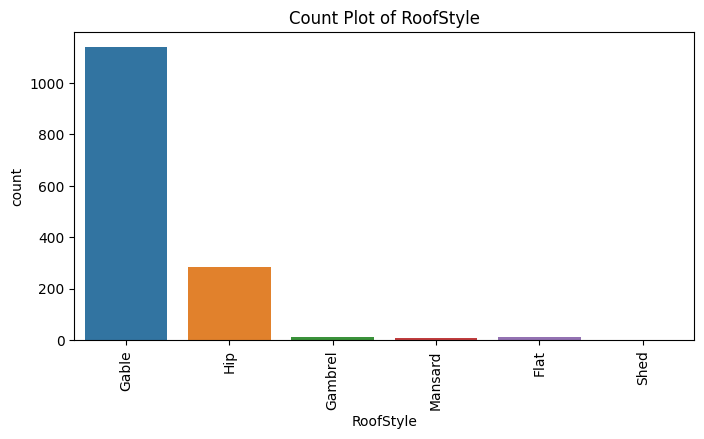

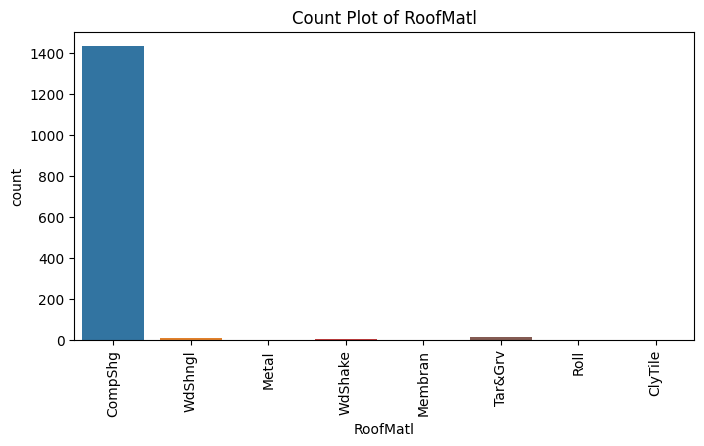

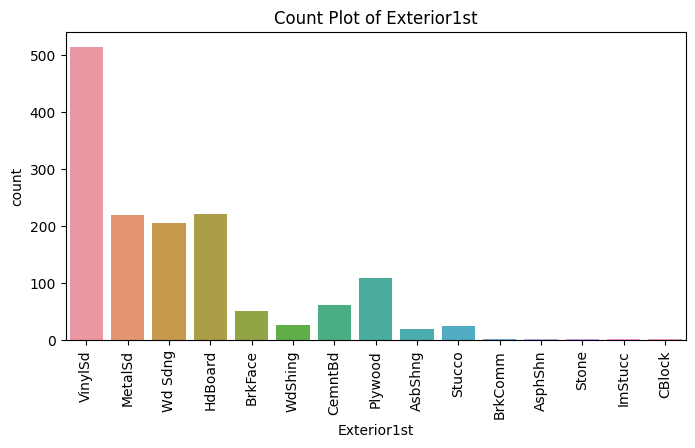

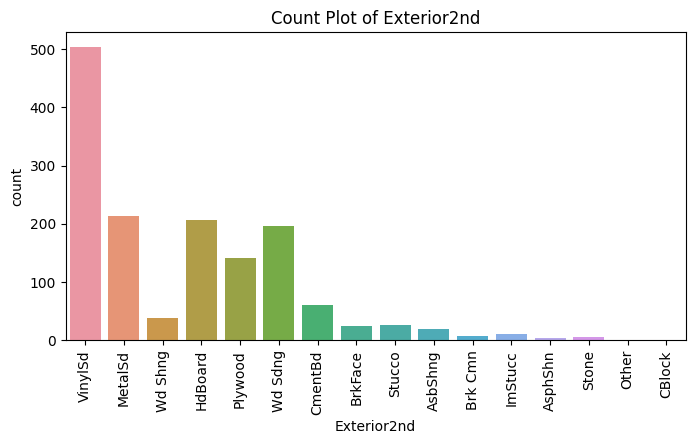

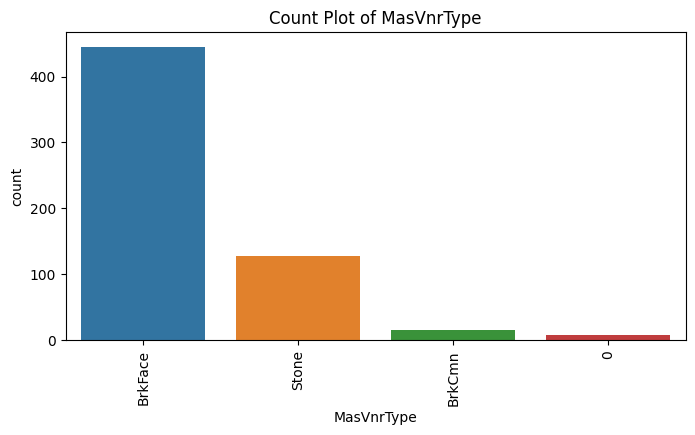

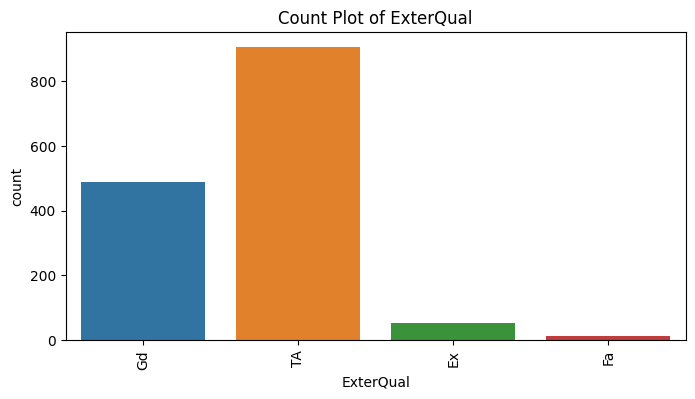

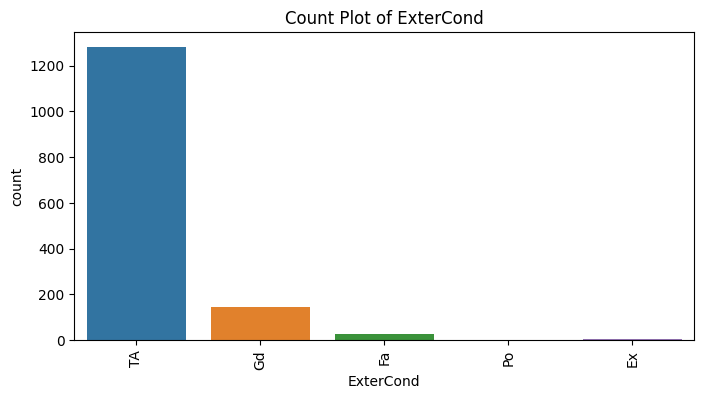

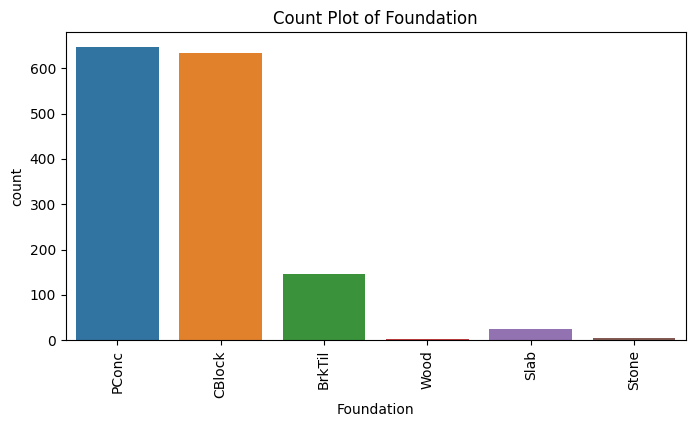

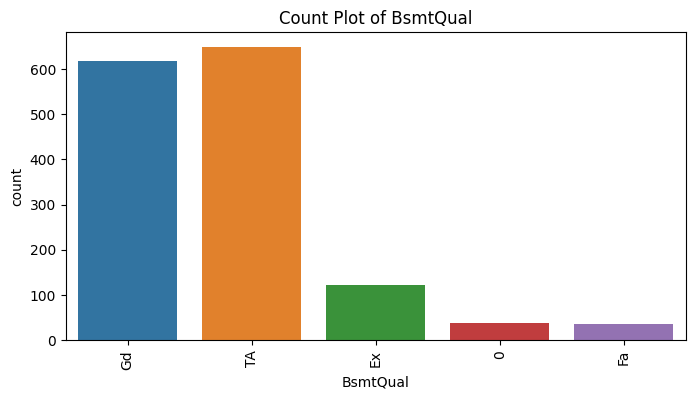

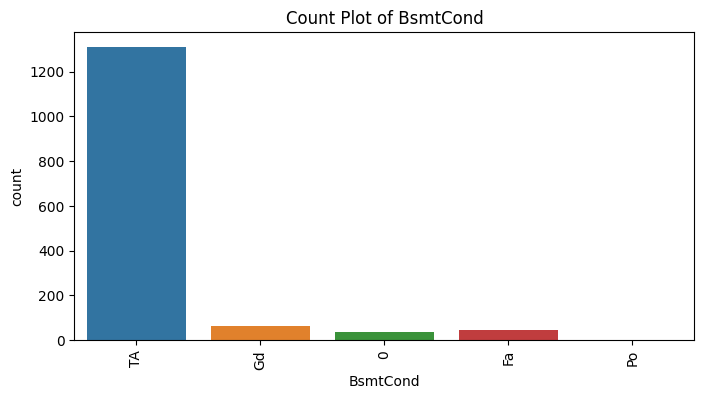

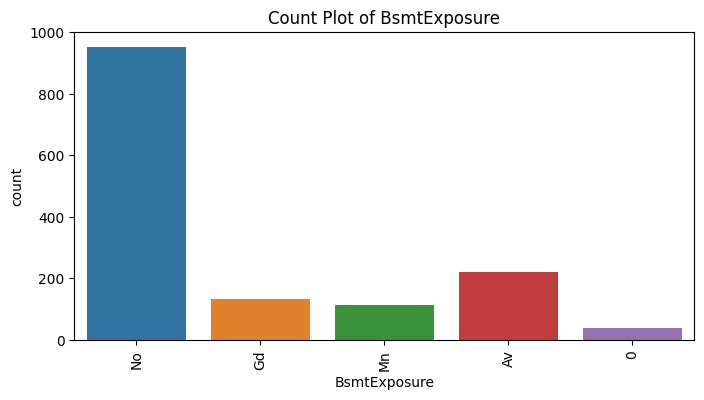

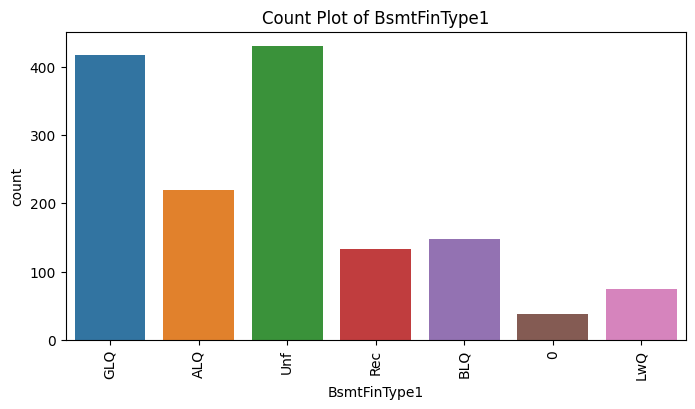

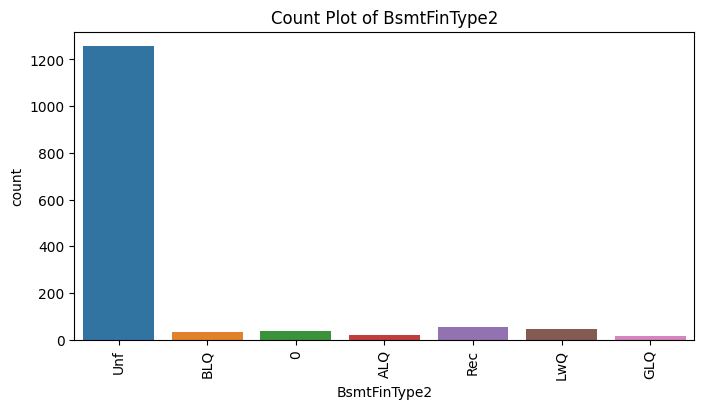

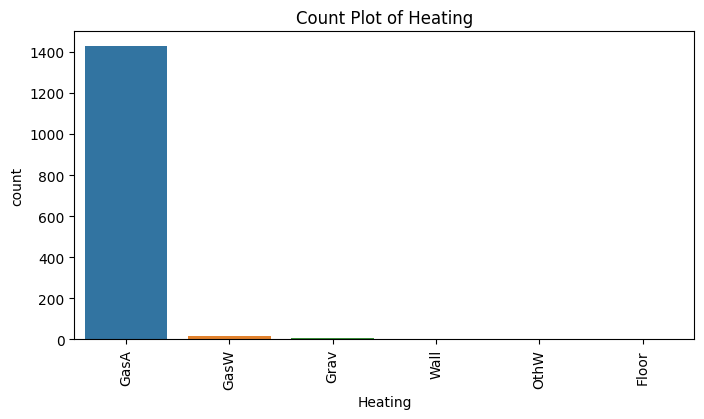

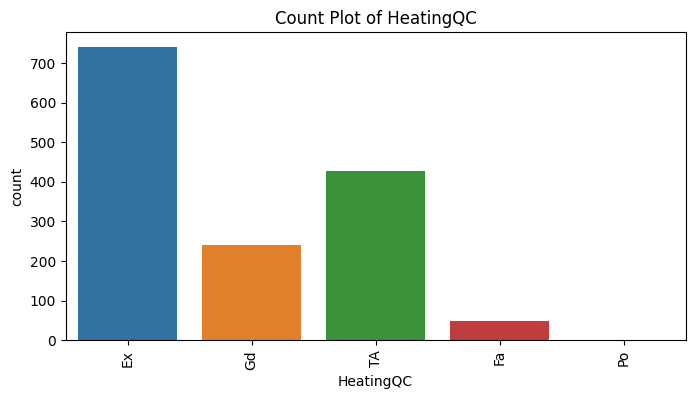

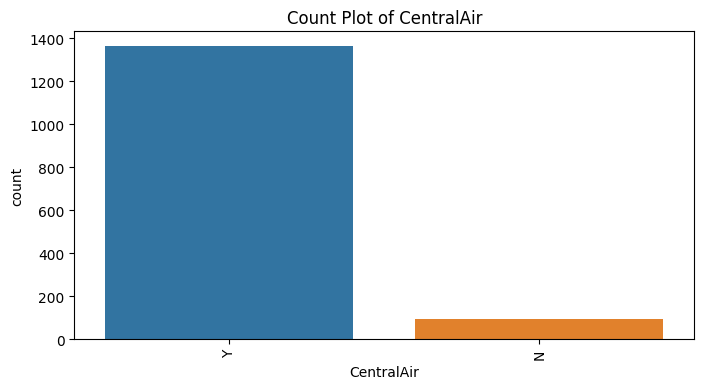

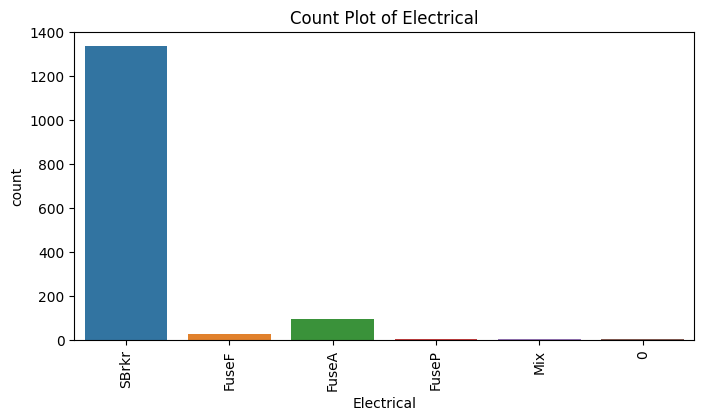

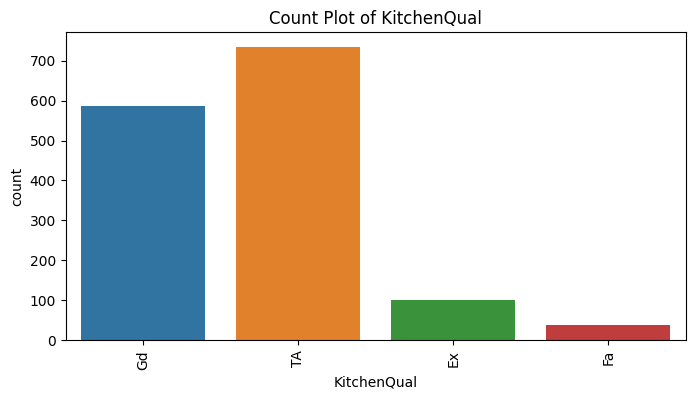

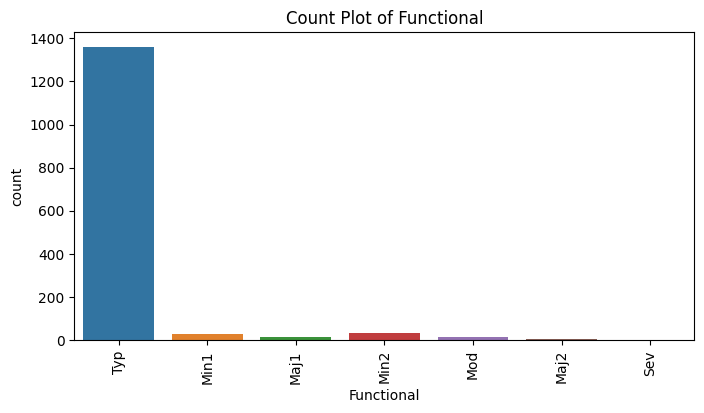

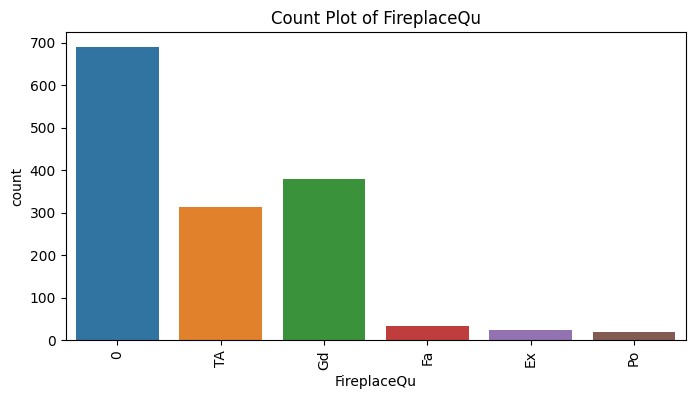

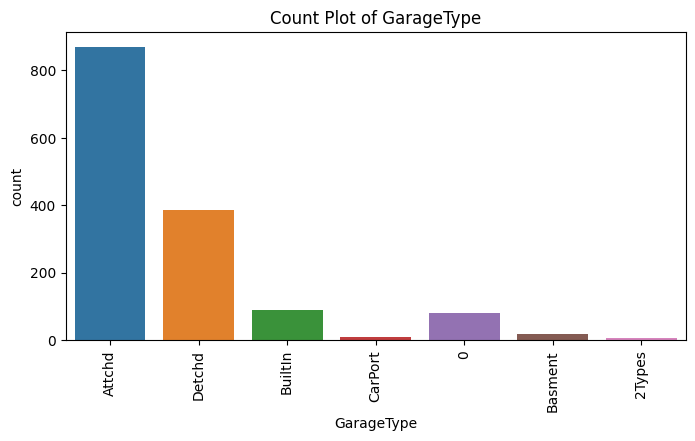

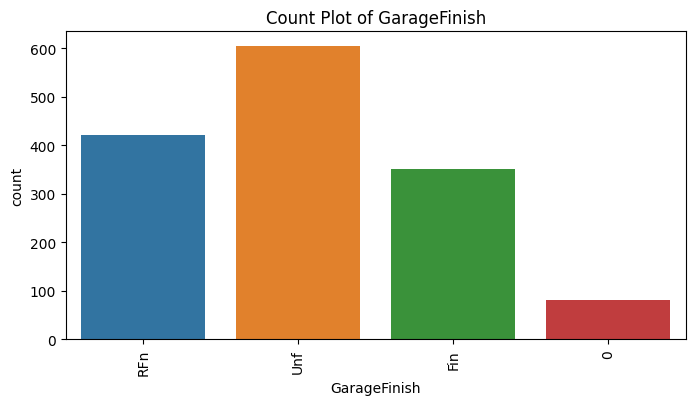

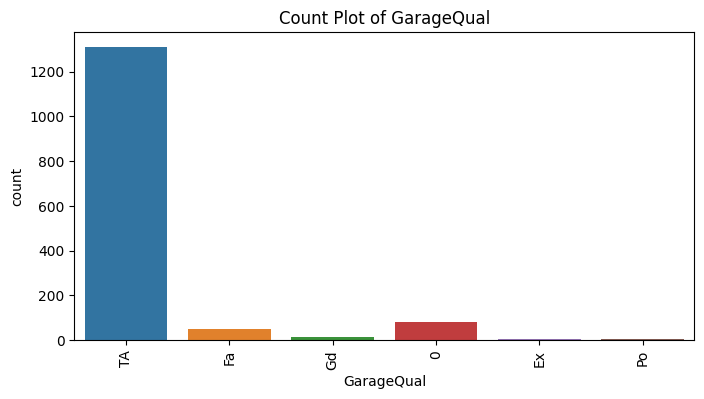

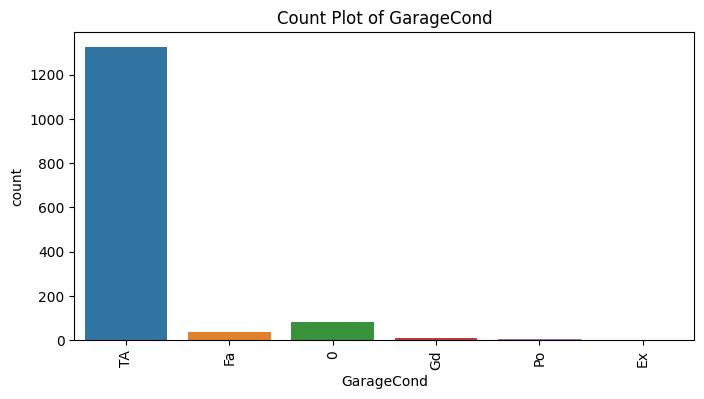

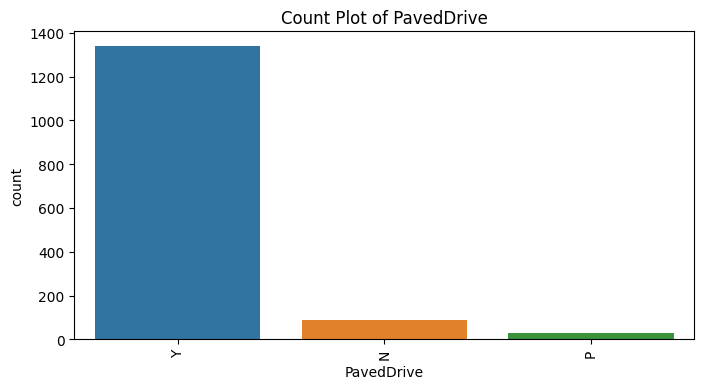

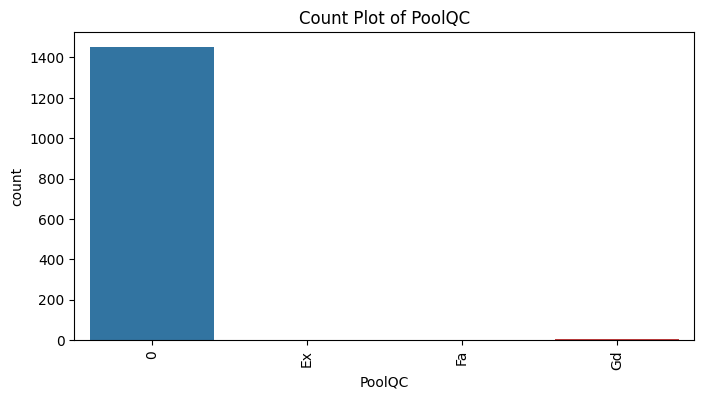

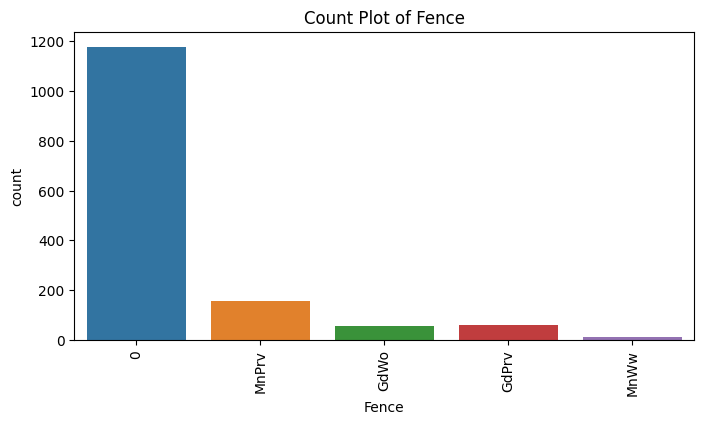

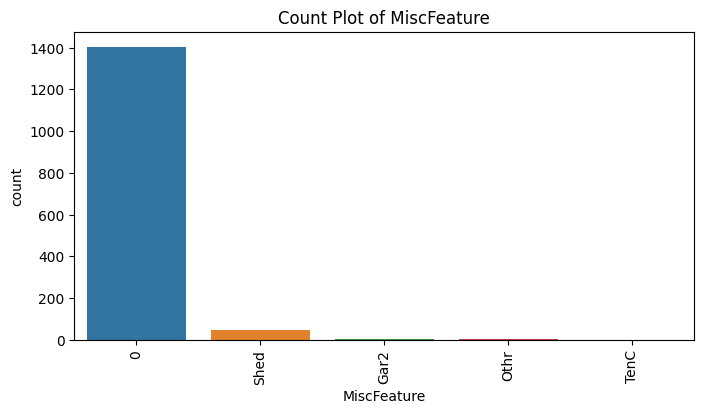

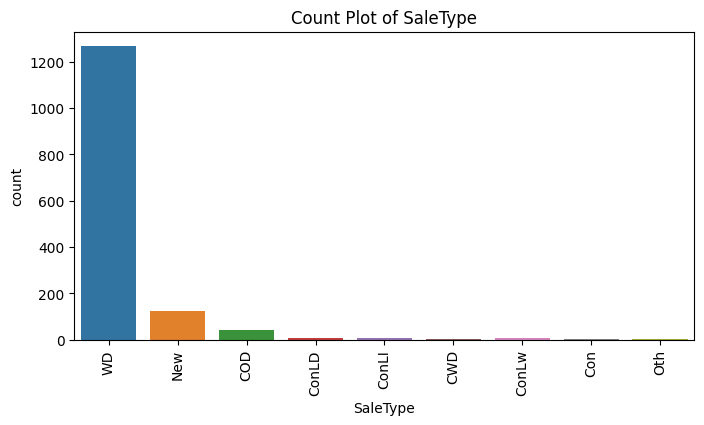

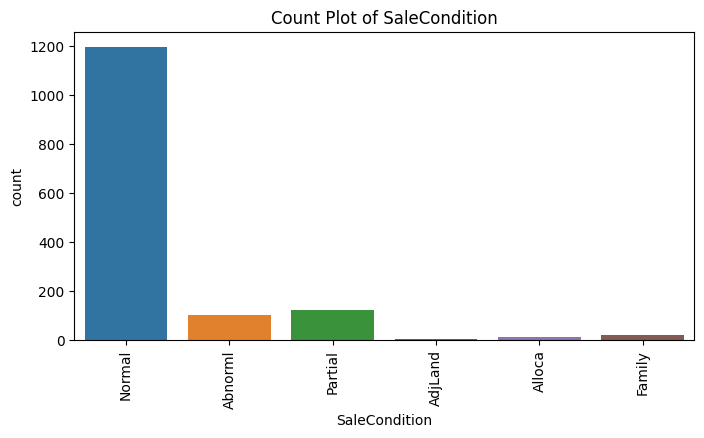

In [5]:
# Count plots for categorical columns
categorical_cols = house.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=house, x=col)
    plt.xticks(rotation=90)
    plt.title(f'Count Plot of {col}')
    plt.show()

In [6]:
# Create a pair plot
#sns.pairplot(house, diag_kind='kde', hue='MSZoning')  # You can specify 'hue' for categorical coloring
#plt.show()

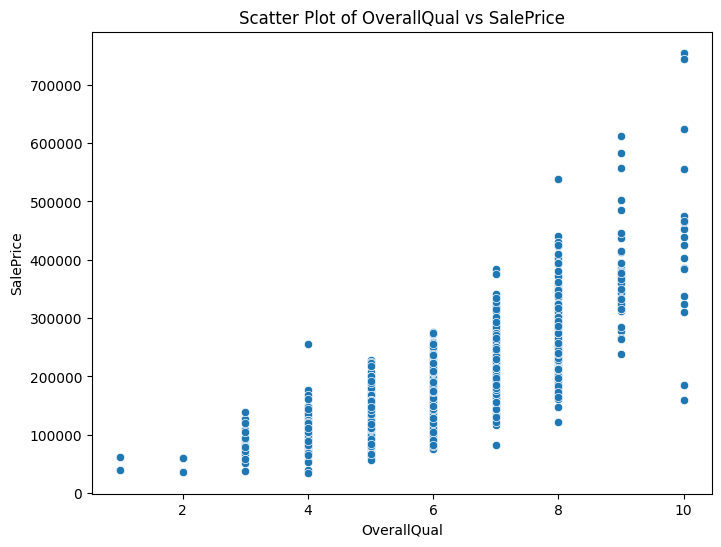

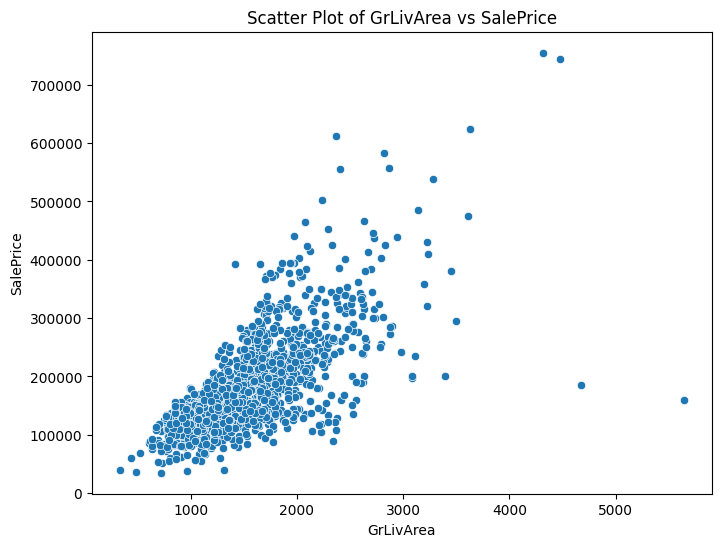

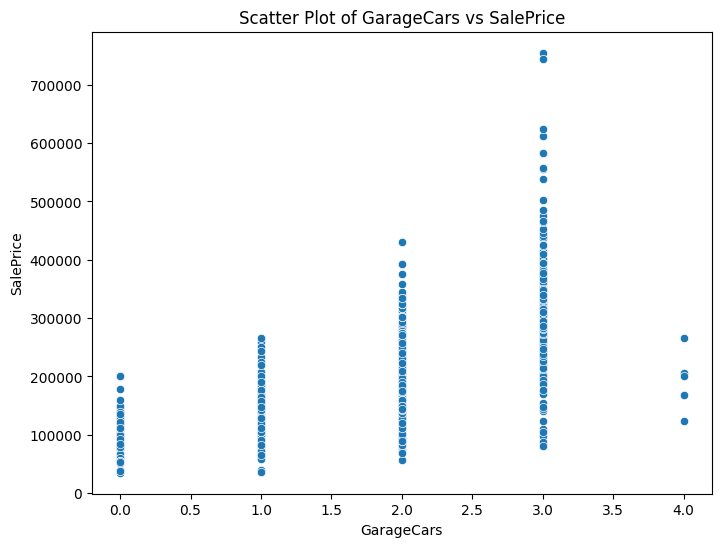

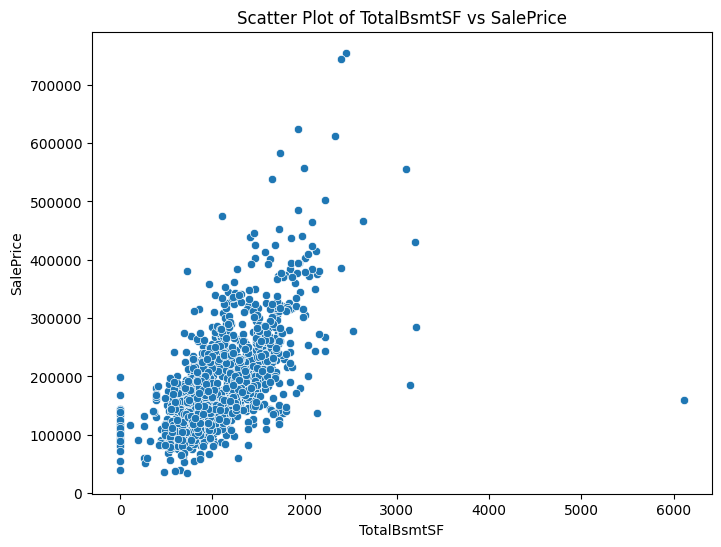

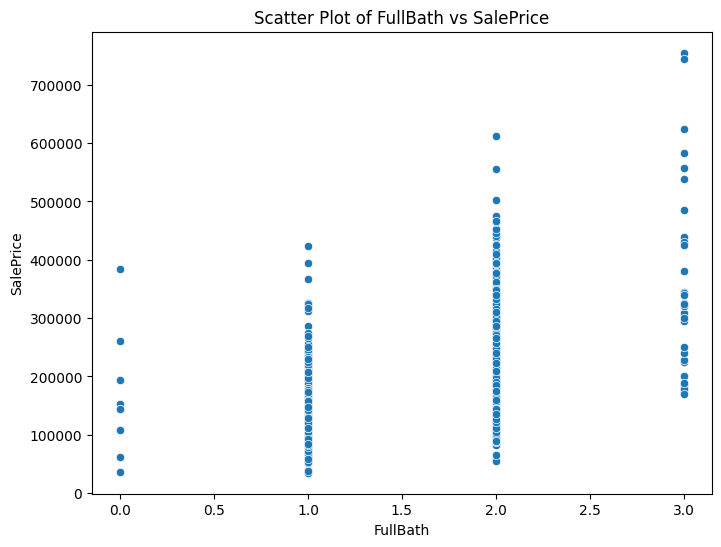

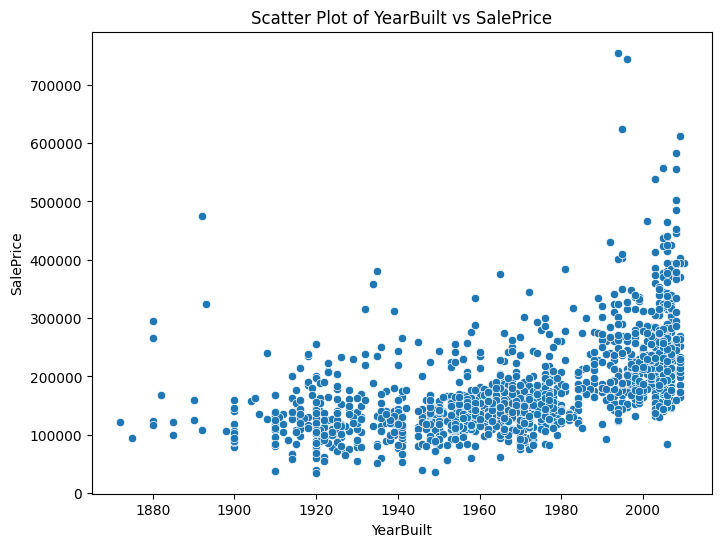

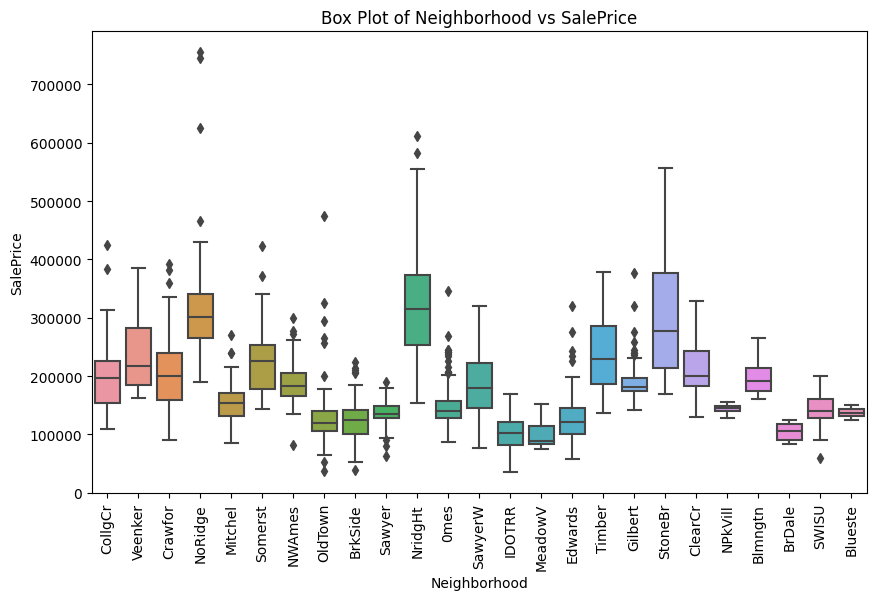

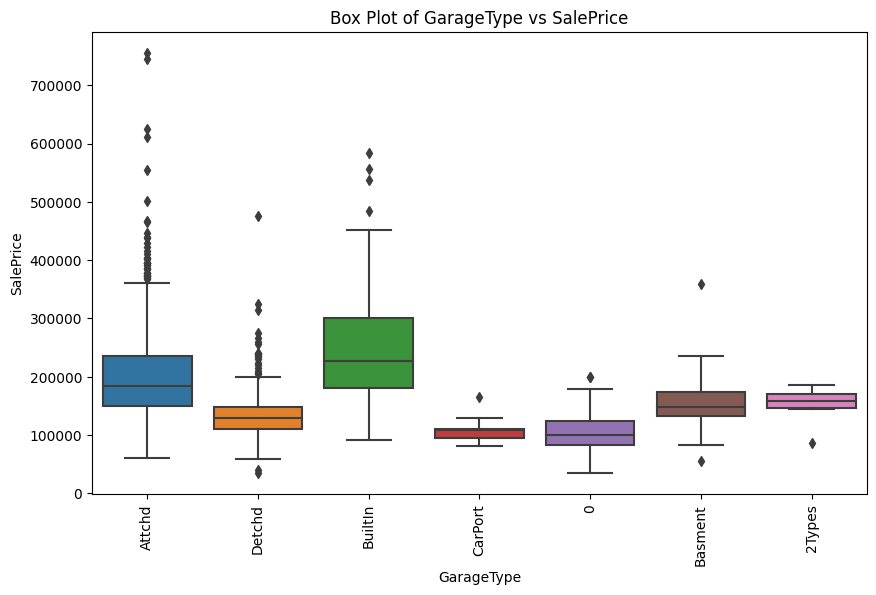

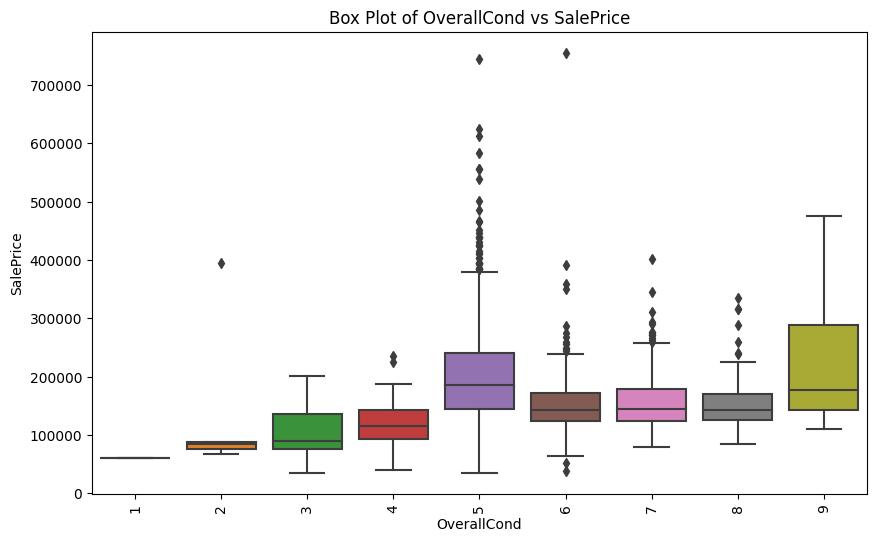

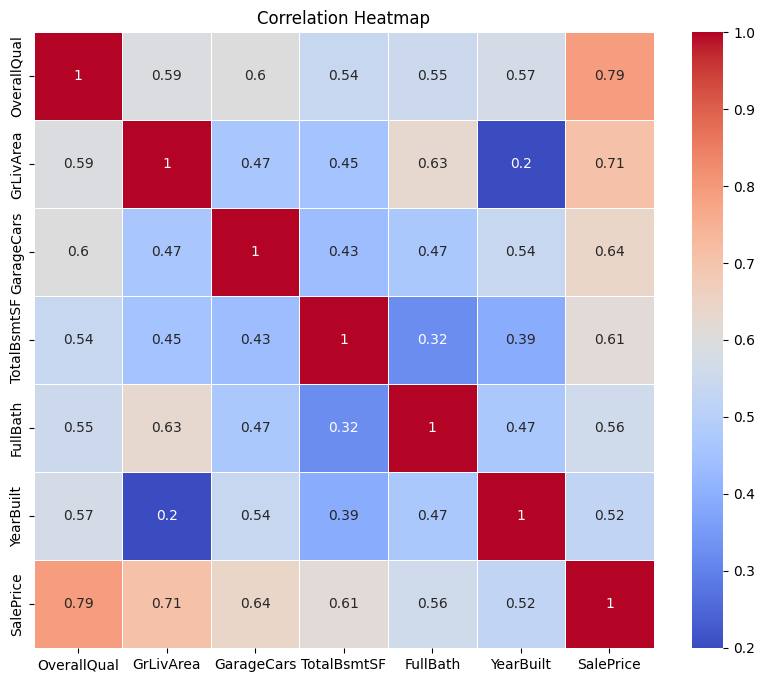

In [7]:
# Select valuable variables you want to compare with SalePrice
valuable_variables = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# Create scatter plots for numeric variables
for var in valuable_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=house, x=var, y='SalePrice')
    plt.title(f'Scatter Plot of {var} vs SalePrice')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()

# Create box plots for categorical variables
categorical_variables = ['Neighborhood', 'GarageType', 'OverallCond']

for var in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=house, x=var, y='SalePrice')
    plt.title(f'Box Plot of {var} vs SalePrice')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=90)
    plt.show()

# Calculate and visualize correlations with SalePrice
correlation_matrix = house[valuable_variables + ['SalePrice']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Check data types for each column
print("Data Types for Each Column:")
print(house.dtypes)

# Check column names
expected_column_names = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
    'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
    'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
    'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
    'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence',
    'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'
]

if not all(col in house.columns for col in expected_column_names):
    print("Column names are not as expected. Check column names in the dataset.")

# Handling Null Values
numeric_columns = house.select_dtypes(include=['number']).columns
categorical_columns = house.select_dtypes(exclude=['number']).columns

# Replace null values in numeric columns with mean
house[numeric_columns] = house[numeric_columns].fillna(house[numeric_columns].mean())

# Replace null values in categorical columns with zero
house[categorical_columns] = house[categorical_columns].fillna(0)

# Save the cleaned dataset
house.to_csv('cleaned_house_data.csv', index=False)

Data Types for Each Column:
Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage       int64
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object


In [9]:
# Check data types for each column
print("Data Types for Each Column:")
print(house_test.dtypes)

# Check column names
expected_column_names = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
    'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
    'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
    'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
    'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence',
    'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'
]

if not all(col in house_test.columns for col in expected_column_names):
    print("Column names are not as expected. Check column names in the dataset.")

# Handling Null Values
numeric_columns = house_test.select_dtypes(include=['number']).columns
categorical_columns = house_test.select_dtypes(exclude=['number']).columns

# Replace null values in numeric columns with mean
house_test[numeric_columns] = house_test[numeric_columns].fillna(house_test[numeric_columns].mean())

# Replace null values in categorical columns with zero
house_test[categorical_columns] = house_test[categorical_columns].fillna(0)

# Save the cleaned dataset
house_test.to_csv('cleaned_house_test_data.csv', index=False)

Data Types for Each Column:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [10]:
if not all(col in house.columns for col in expected_column_names):
    print("Column names are not as expected. Check column names in the dataset.")

# Print count of null values in each column
null_values = house.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [11]:
if not all(col in house_test.columns for col in expected_column_names):
    print("Column names are not as expected. Check column names in the dataset.")

# Print count of null values in each column
null_values = house_test.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [12]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_house_data.csv')

# Remove the 'Id' column
df = df.drop(columns=['Id'])

# Feature Engineering Steps:

# 1. Combine the square footage features into one total area feature
df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# 2. Create a binary feature 'HasGarage' to indicate whether the house has a garage or not
df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# 3. Create a binary feature 'HasBsmt' to indicate whether the house has a basement or not
df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

# 4. Create a binary feature 'HasFireplace' to indicate whether the house has a fireplace or not
df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# 5. Create a feature 'YearsSinceRemodel' indicating years since the last remodel
df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']

# 6. Drop columns that were used to create new features or are no longer needed
df = df.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'YearRemodAdd'])

# 7. One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
                                 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                                 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                                 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                                 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                                 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
                                 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], 
                    drop_first=True)

# 8. Log transform the target variable 'SalePrice' to make it more normally distributed
df['SalePrice'] = df['SalePrice'].apply(lambda x: np.log1p(x))

# Now you have a feature-engineered dataset ready for machine learning

# Save the feature-engineered dataset
df.to_csv('feature_engineered_house_data.csv', index=False)

In [13]:
# Load the cleaned dataset
df1 = pd.read_csv('cleaned_house_test_data.csv')

# Remove the 'Id' column
df1 = df1.drop(columns=['Id'])

# Feature Engineering Steps:

# 1. Combine the square footage features into one total area feature
df1['TotalArea'] = df1['TotalBsmtSF'] + df1['1stFlrSF'] + df1['2ndFlrSF']

# 2. Create a binary feature 'HasGarage' to indicate whether the house has a garage or not
df1['HasGarage'] = df1['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# 3. Create a binary feature 'HasBsmt' to indicate whether the house has a basement or not
df1['HasBsmt'] = df1['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

# 4. Create a binary feature 'HasFireplace' to indicate whether the house has a fireplace or not
df1['HasFireplace'] = df1['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# 5. Create a feature 'YearsSinceRemodel' indicating years since the last remodel
df1['YearsSinceRemodel'] = df1['YrSold'] - df1['YearRemodAdd']

# 6. Drop columns that were used to create new features or are no longer needed
df1 = df1.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'YearRemodAdd'])

# 7. One-Hot Encoding for categorical variables
df1 = pd.get_dummies(df1, columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
                                 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                                 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                                 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                                 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                                 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
                                 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], 
                    drop_first=True)

# 8. Log transform the target variable 'SalePrice' to make it more normally distributed
df1['SalePrice'] = df1['SalePrice'].apply(lambda x: np.log1p(x))

# Now you have a feature-engineered dataset ready for machine learning

# Save the feature-engineered dataset
df1.to_csv('feature_engineered_house_test_data.csv', index=False)



In [14]:
# Load the feature-engineered dataset
df = pd.read_csv('feature_engineered_house_data.csv')

# Remove rows with unique 'SalePrice' values
df = df[df.groupby('SalePrice')['SalePrice'].transform('count') > 1]

# Define your features (X) and target (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data into training and testing sets with stratification based on 'SalePrice'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=df['SalePrice'])

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (789, 273)
X_test shape: (264, 273)
y_train shape: (789,)
y_test shape: (264,)


In [15]:
# Load the feature-engineered dataset
df = pd.read_csv('feature_engineered_house_data.csv')

# Define your features (X) and target (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data into training and testing sets with stratification based on 'SalePrice'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Create a DataFrame to display predicted and actual values
results_df = pd.DataFrame({'Actual SalePrice': y_test, 'Predicted SalePrice': y_pred})

# Print the results
print(results_df)

      Actual SalePrice  Predicted SalePrice
892          11.947956            11.939057
1105         12.691584            12.696705
413          11.652696            11.474792
522          11.976666            12.030202
1036         12.661917            12.626876
...                ...                  ...
271          12.394629            10.508611
240          12.478010            12.434012
597          12.176654            12.258091
946          11.870607            11.824813
358          11.775297            11.700934

[219 rows x 2 columns]


In [16]:
# Load the feature-engineered dataset
df = pd.read_csv('feature_engineered_house_data.csv')

# Define your features (X) and target (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data into training and testing sets with stratification based on 'SalePrice'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R²): 0.8190296106177024
Root Mean Squared Error (RMSE): 0.18570272172553037


In [17]:
# Load the feature-engineered dataset
df = pd.read_csv('feature_engineered_house_data.csv')

# Define your features (X) and target (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data into training and testing sets with stratification based on 'SalePrice'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Create a DataFrame to display predicted and actual values
results_df = pd.DataFrame({'Actual SalePrice': y_test, 'Predicted SalePrice': y_pred})

# Print the results
print("Results for the original test dataset:")
print(results_df)


Results for the original test dataset:
      Actual SalePrice  Predicted SalePrice
892          11.947956            11.939057
1105         12.691584            12.696705
413          11.652696            11.474792
522          11.976666            12.030202
1036         12.661917            12.626876
...                ...                  ...
271          12.394629            10.508611
240          12.478010            12.434012
597          12.176654            12.258091
946          11.870607            11.824813
358          11.775297            11.700934

[219 rows x 2 columns]


In [18]:
selected_columns = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
                    'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
                    'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                    'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
                    'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                    'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
                    'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
                    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
                    'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
                    'SalePrice']

# Load the dataset with selected columns
house_train = pd.read_csv('/kaggle/input/house-pred/train.csv', usecols=selected_columns)
house_test=pd.read_csv('/kaggle/input/house-pred/test.csv', usecols=selected_columns)

In [19]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [20]:

# Separate the target variable (SalePrice) from the features
X_train = house_train.drop(columns=['SalePrice'])
y_train = house_train['SalePrice']

# Combine training and test datasets for consistent one-hot encoding
combined_data = pd.concat([X_train, house_test], axis=0, ignore_index=True)

# Separate categorical and numerical columns
categorical_cols = combined_data.select_dtypes(include=['object']).columns

# One-hot encode categorical columns for both training and test data
combined_data = pd.get_dummies(combined_data, columns=categorical_cols, drop_first=True)

# Split the combined data back into training and test datasets
X_train = combined_data.iloc[:len(X_train)]
X_test = combined_data.iloc[len(X_train):]

# Reorder the columns in X_test to match the order in X_train
X_test = X_test[X_train.columns]

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Split the training data into a training set and a validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create and train your regression model (e.g., Linear Regression or XGBoost)
# Example using Linear Regression:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = model.predict(X_valid)

# Evaluate the model (e.g., calculate RMSE)
rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
print(f'Root Mean Squared Error (RMSE) on Validation Data: {rmse}')

# Now, use the trained model to make predictions on the test set
y_test_pred = model.predict(X_test)

# You can save the predictions to a CSV file if needed
predictions_df = pd.DataFrame({'SalePrice': y_test_pred})
predictions_df.to_csv('house_price_predictions.csv', index=False)

Root Mean Squared Error (RMSE) on Validation Data: 83073.54954600995


In [21]:
# Separate the target variable (SalePrice) from the features
X_train = house_train.drop(columns=['SalePrice'])
y_train = house_train['SalePrice']

# Combine training and test datasets for consistent one-hot encoding
combined_data = pd.concat([X_train, house_test], axis=0, ignore_index=True)

# Separate categorical and numerical columns
categorical_cols = combined_data.select_dtypes(include=['object']).columns

# One-hot encode categorical columns for both training and test data
combined_data = pd.get_dummies(combined_data, columns=categorical_cols, drop_first=True)

# Split the combined data back into training and test datasets
X_train = combined_data.iloc[:len(X_train)]
X_test = combined_data.iloc[len(X_train):]

# Reorder the columns in X_test to match the order in X_train
X_test = X_test[X_train.columns]

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Split the training data into a training set and a validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create and train your regression model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Load the test dataset with IDs
test_with_ids = pd.read_csv('/kaggle/input/house-pred/test.csv', usecols=['Id'])

# Create a DataFrame with IDs and predicted sale prices
test_predictions = pd.DataFrame({'Id': test_with_ids['Id'], 'SalePrice': y_test_pred})

# Print the DataFrame
print(test_predictions)

# Save the output
test_predictions.to_csv('test_predictions', index=False)


        Id      SalePrice
0     1461  123228.157285
1     1462  156078.025516
2     1463  188067.817319
3     1464  193447.852634
4     1465  213306.937440
...    ...            ...
1454  2915  -42913.888332
1455  2916   86048.767952
1456  2917  178508.869877
1457  2918   -1576.846635
1458  2919  218146.536981

[1459 rows x 2 columns]
